# Financial Portfolios, Modern Portfolio Theory & Asset Pricing

---

# Getting the Data

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     start = "2014-01-01", end = "2018-12-31")

In [3]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [4]:
stocks.head()

Adj Close                                                \
                 AMZN          BA        DIS         IBM         KO   
Date                                                                  
2014-01-02  19.898500  116.807938  70.192513  116.571388  29.837297   
2014-01-03  19.822001  117.619873  70.045265  117.268791  29.690529   
2014-01-06  19.681499  118.295082  69.778374  116.866661  29.551111   
2014-01-07  19.901501  120.089882  70.256935  119.197685  29.639158   
2014-01-08  20.096001  120.354836  69.226204  118.104401  29.308931   

                           Close                                     ...  \
                 MSFT       AMZN          BA        DIS         IBM  ...   
Date                                                                 ...   
2014-01-02  31.290831  19.898500  136.669998  76.269997  177.370941  ...   
2014-01-03  31.080299  19.822001  137.619995  76.110001  178.432129  ...   
2014-01-06  30.423508  19.681499  138.410004  75.820000  177.820267  ...   
2014-01-07  30.659281  19.901501  140.509995  76.339996  181.367111  ...   
2014-01-08  30.111938  20.096001  140.820007  75.220001  179.703629  ...   

                 Open                                      Volume           \
                  DIS         IBM         KO       MSFT      AMZN       BA   
Date                                                                         
2014-01-02  76.040001  178.977051  41.119999  37.349998  42756000  3366700   
2014-01-03  76.300003  177.657745  40.680000  37.200001  44204000  3177400   
2014-01-06  76.529999  178.919693  40.480000  36.849998  63412000  4196500   
2014-01-07  76.120003  178.193115  40.480000  36.330002  38320000  4238500   
2014-01-08  76.129997  181.003830  40.439999  36.000000  46330000  4236100   

                                                   
                 DIS      IBM        KO      MSFT  
Date                                               
2014-01-02   5200900  4755639  12698600  30632200  
2014-01-03   4060700  4250107  10403400  31134800  
2014-01-06   6816200  4254919  11036300  43603700  
2014-01-07   4494900  6205186  11872300  35802800  
2014-01-08  10900300  4815470  15339600  59971700  

[5 rows x 36 columns]

In [5]:
stocks.tail()

Adj Close                                                \
                 AMZN          BA         DIS        IBM         KO   
Date                                                                  
2018-12-21  68.872498  295.930267  102.961685  83.103706  41.018909   
2018-12-24  67.197998  285.834351   99.138412  80.579285  39.630634   
2018-12-26  73.544998  305.044769  104.552246  83.440781  40.475670   
2018-12-27  73.082001  308.163940  105.233910  85.231102  40.984417   
2018-12-28  73.901001  307.425446  106.004501  84.669304  40.699863   

                           Close                                      ...  \
                 MSFT       AMZN          BA         DIS         IBM  ...   
Date                                                                  ...   
2018-12-21  93.278931  68.872498  304.549988  104.220001  106.061188  ...   
2018-12-24  89.385574  67.197998  294.160004  100.349998  102.839386  ...   
2018-12-26  95.491486  73.544998  313.929993  105.830002  106.491394  ...   
2018-12-27  96.080238  73.082001  317.140015  106.519997  108.776291  ...   
2018-12-28  95.330070  73.901001  316.380005  107.300003  108.059273  ...   

                  Open                                        Volume           \
                   DIS         IBM         KO        MSFT       AMZN       BA   
Date                                                                            
2018-12-21  106.470001  107.552582  47.259998  101.629997  272806000  7641700   
2018-12-24  103.230003  105.066925  47.619999   97.680000  144400000  3435300   
2018-12-26  100.489998  103.250481  45.880001   95.139999  208236000  4843400   
2018-12-27  104.410004  105.152962  46.740002   99.300003  194440000  4341100   
2018-12-28  107.279999  109.196938  47.889999  102.089996  176580000  3725200   

                                                     
                 DIS       IBM        KO       MSFT  
Date                                                 
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[5 rows x 36 columns]

In [6]:
stocks = stocks["Adj Close"].copy()

In [7]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.898500,116.807938,70.192513,116.571388,29.837297,31.290831
2014-01-03,19.822001,117.619873,70.045265,117.268791,29.690529,31.080299
2014-01-06,19.681499,118.295082,69.778374,116.866661,29.551111,30.423508
2014-01-07,19.901501,120.089882,70.256935,119.197685,29.639158,30.659281
2014-01-08,20.096001,120.354836,69.226204,118.104401,29.308931,30.111938


In [8]:
stocks.to_csv("port_stocks.csv")

---

# Creating the equal-weighted Portfolio

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

C:\Users\97250\AppData\Local\Temp\ipykernel_20428\4089696133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [10]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [11]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.8985,116.8079,70.1925,116.5714,29.8373,31.2908
2014-01-03,19.8220,117.6199,70.0453,117.2688,29.6905,31.0803
2014-01-06,19.6815,118.2951,69.7784,116.8667,29.5511,30.4235
2014-01-07,19.9015,120.0899,70.2569,119.1977,29.6392,30.6593
2014-01-08,20.0960,120.3548,69.2262,118.1044,29.3089,30.1119


In [12]:
# Calculate the simple return 
ret = stocks.pct_change().dropna()

In [13]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064


In [14]:
# Compute the mean return of the instruments for each row 
ret.mean(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [15]:
# number of asset
no_assets = len(stocks.columns)
no_assets

6

In [16]:
# Compute the weigths. its equaly between all asset
weights = [1/no_assets for i in range(no_assets)]
weights

# Each asset have equalt weigths 

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
# EWI: 
ret.mul(weights, axis = "columns").sum(axis = 1)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [18]:
# Or we can take the dot product between the:
# return of each instruments and its weigth.
ret.dot(weights)

Date
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0106
2014-01-08   -0.0068
2014-01-09   -0.0020
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1256, dtype: float64

In [19]:
# compute EWP
ret["EWP"] = ret.dot(weights)

In [20]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0008
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0106
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0020


In [21]:
summary = ret.agg(["mean", "std"]).T

In [22]:
summary

,mean,std
AMZN,0.0012,0.0195
BA,0.0009,0.0147
DIS,0.0004,0.0119
IBM,-0.0002,0.0126
KO,0.0003,0.0086
MSFT,0.0010,0.0146
EWP,0.0006,0.0095


In [23]:
summary.columns = ["Return", "Risk"]

In [24]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [25]:
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317
EWP,0.1518,0.1514


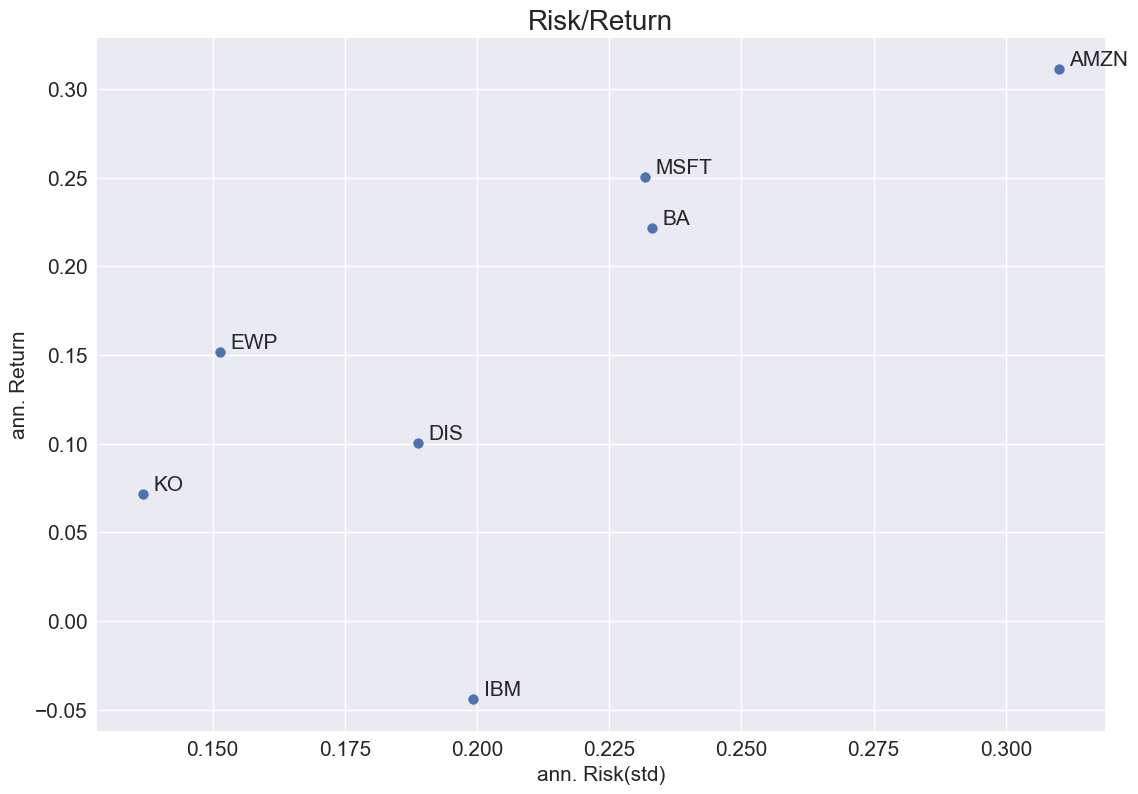

In [26]:
# Plot the annualize risk & return of the instruments and the index
summary.plot(kind = "scatter", 
             x = "Risk", 
             y = "Return", 
             figsize = (13,9), 
             s = 50, 
             fontsize = 15)

for i in summary.index:
    plt.annotate(i,
                  xy=(summary.loc[i, "Risk"]+0.002, 
                      summary.loc[i, "Return"]+0.002), 
                      size = 15)

plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [27]:
# Function to calculate the annualize risk & return
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T # calculate mean & std
    summary.columns = ["Return", "Risk"] 
    summary.Return = summary.Return*252 # annualize return
    summary.Risk = summary.Risk * np.sqrt(252) # annualize risk 
    return summary

----

# Creating many Random Portfolios
> We are going to create many random portfolios consisting of our six stocks.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

C:\Users\97250\AppData\Local\Temp\ipykernel_20428\4089696133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [29]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [30]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.8985,116.8079,70.1925,116.5714,29.8373,31.2908
2014-01-03,19.8220,117.6199,70.0453,117.2688,29.6905,31.0803
2014-01-06,19.6815,118.2951,69.7784,116.8667,29.5511,30.4235
2014-01-07,19.9015,120.0899,70.2569,119.1977,29.6392,30.6593
2014-01-08,20.0960,120.3548,69.2262,118.1044,29.3089,30.1119


In [31]:
ret = stocks.pct_change().dropna()
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064


In [32]:
summary = ann_risk_return(ret)

In [33]:
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317


In [34]:
# number of assets
noa = len(stocks.columns)
noa

6

In [35]:
# number of pertfolios
nop = 100000

In [36]:
# For example, if we want to create 10 random portfolios:
# there are 10 portfilio, each portfolio have 6 weigths (for 6 asset).
np.random.random(10*6).reshape(10,6)

array([[0.52940542, 0.08006234, 0.82107238, 0.71540454, 0.37190536,
        0.09103971],
       [0.08994402, 0.87350659, 0.12540791, 0.71981685, 0.85336912,
        0.78026902],
       [0.60980966, 0.22305893, 0.90184076, 0.78273735, 0.15595273,
        0.88334711],
       [0.93759298, 0.62883504, 0.14384087, 0.85123425, 0.73836545,
        0.77149571],
       [0.59517365, 0.9852745 , 0.10670762, 0.33034363, 0.00802785,
        0.06674867],
       [0.06368678, 0.54162841, 0.43729528, 0.68647042, 0.10919347,
        0.46076013],
       [0.54313846, 0.30756001, 0.74058072, 0.45746853, 0.08331568,
        0.91832695],
       [0.6989978 , 0.72084436, 0.51373702, 0.01231895, 0.7507535 ,
        0.34850217],
       [0.70485416, 0.46759372, 0.64260914, 0.72624633, 0.69996687,
        0.06158061],
       [0.4602452 , 0.63442479, 0.45590645, 0.35583251, 0.98487811,
        0.76016728]])

In [37]:
# Create 10000 random portfolios
# noa * nop ---> number of assets * number of portfolio
# that we reshape that
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [38]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.51954687, 0.85226532, 0.87403327, 0.10039779, 0.25265273,
        0.01875777],
       [0.64206112, 0.41780645, 0.76066273, 0.33994549, 0.1620518 ,
        0.94008933],
       [0.23120286, 0.86951896, 0.50415836, 0.32237088, 0.25906289,
        0.90163486]])

In [39]:
matrix.sum(axis = 1, keepdims= True)
# Each portfolio weigths sum to one?
# NO. we need fix that by normalize that.

array([[2.90335017],
       [3.61087108],
       [1.99223329],
       ...,
       [2.61765375],
       [3.26261692],
       [3.08794881]])

In [40]:
# normalize the wegiths for each portfolio
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [41]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [42]:
# senity cheack:
# the sum of each portfolio weigths sum to 1. 
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [43]:
# Compute the portfolios return!
# we multiplt the return by the corresponding weigths
port_ret = ret.dot(weights.T)

In [44]:
# Here's the portfolio return of portfolio 1,..,10000: 
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.0015,-0.0012,0.0001,-0.0006,-0.0022,0.0002,0.0005,-0.0023,0.0001,-0.0012,...,0.0007,-0.0014,0.0032,0.0004,-0.0016,-0.0003,-0.0010,0.0005,-0.0019,-0.0004
2014-01-06,-0.0063,-0.0064,-0.0057,-0.0058,-0.0079,-0.0046,-0.0024,-0.0082,-0.0055,-0.0062,...,-0.0018,-0.0064,-0.0016,-0.0054,-0.0091,-0.0079,-0.0058,-0.0015,-0.0082,-0.0065
2014-01-07,0.0104,0.0108,0.0126,0.0109,0.0101,0.0110,0.0107,0.0090,0.0119,0.0100,...,0.0105,0.0105,0.0140,0.0127,0.0116,0.0116,0.0105,0.0106,0.0102,0.0108
2014-01-08,-0.0057,-0.0045,-0.0067,-0.0077,-0.0055,-0.0088,-0.0061,-0.0102,-0.0060,-0.0087,...,-0.0061,-0.0066,-0.0042,-0.0048,-0.0073,-0.0114,-0.0049,-0.0038,-0.0079,-0.0081
2014-01-09,-0.0028,-0.0016,-0.0033,-0.0024,-0.0025,-0.0017,-0.0006,-0.0031,-0.0016,-0.0031,...,0.0004,-0.0036,0.0019,-0.0012,-0.0039,-0.0028,-0.0012,0.0005,-0.0027,-0.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.0264,-0.0326,-0.0282,-0.0248,-0.0327,-0.0215,-0.0244,-0.0265,-0.0254,-0.0214,...,-0.0284,-0.0238,-0.0255,-0.0321,-0.0309,-0.0242,-0.0288,-0.0297,-0.0320,-0.0275
2018-12-24,-0.0323,-0.0330,-0.0318,-0.0336,-0.0333,-0.0345,-0.0334,-0.0359,-0.0329,-0.0338,...,-0.0345,-0.0320,-0.0335,-0.0326,-0.0330,-0.0360,-0.0332,-0.0331,-0.0347,-0.0357
2018-12-26,0.0555,0.0653,0.0548,0.0536,0.0653,0.0500,0.0545,0.0578,0.0546,0.0490,...,0.0614,0.0506,0.0572,0.0633,0.0601,0.0532,0.0610,0.0628,0.0644,0.0604


In [45]:
# Compute the annuzliaze risk & return of all the portfolios
port_summary = ann_risk_return(port_ret)

In [46]:
port_summary

,Return,Risk
0,0.1502,0.1534
1,0.1925,0.1712
2,0.1075,0.1588
3,0.1325,0.1466
4,0.1959,0.1724
...,...,...
99995,0.1238,0.1554
99996,0.1835,0.1611
99997,0.1744,0.1638
99998,0.1841,0.1681


__Plot the annualize risk & return of each portfolio__

> Each portfolio contain the 6 instruments with different weigths. 

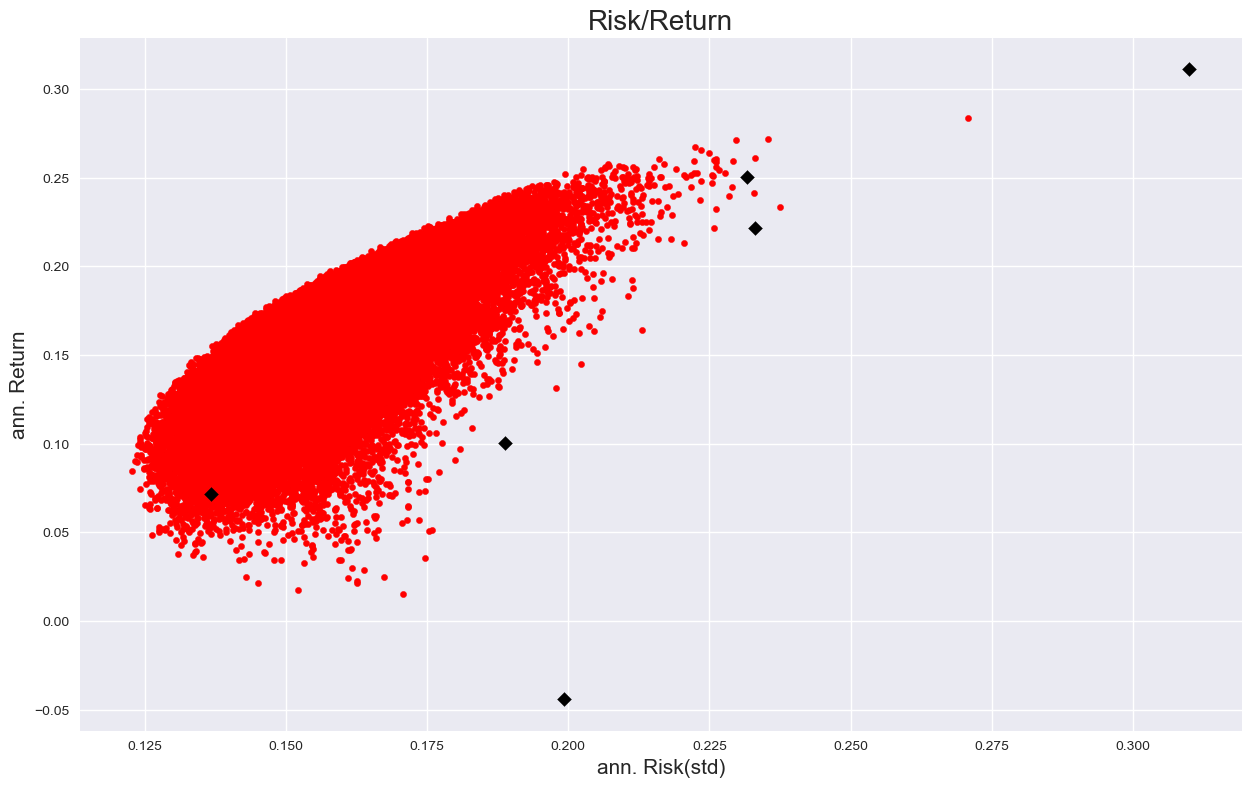

In [47]:
plt.figure(figsize = (15, 9))

# Plot the 10000 random portfolios annualize risk & return
plt.scatter(port_summary.loc[:, "Risk"], 
            port_summary.loc[:, "Return"], 
            s= 20, 
            color = "red")

# Plot the 6 instruments annualize risk & return
plt.scatter(summary.loc[:, "Risk"], 
            summary.loc[:, "Return"], 
            s= 50, color = "black", 
            marker = "D")

plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# What is the Sharpe Ratio and a Risk Free Asset? 

\begin{equation}
    SharpeRatio = \frac{Port Return - RFR}{Port Risk}
\end{equation}

In [48]:
# Risk free return: is the return that have no risk! std = 0. 
risk_free_return = 0.017
# and ofcurse, that the risk free risk is 0. 
risk_free_risk = 0

# so we can gain 0.017% without risk. 

In [49]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

---

# Portfolio Analysis with the Sharpe Ratio

In [50]:
# annualize risk & return of the instruments
summary

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330
DIS,0.1006,0.1888
IBM,-0.0442,0.1993
KO,0.0717,0.1368
MSFT,0.2504,0.2317


In [51]:
# annualize risk & return of the 10000 random portfolios 
port_summary.head()

,Return,Risk
0,0.1502,0.1534
1,0.1925,0.1712
2,0.1075,0.1588
3,0.1325,0.1466
4,0.1959,0.1724


In [52]:
# compute the sharp ratio of each instrument
# sharp ratio - the the ratio between risk and return.
#              the higher -> the bettwe
#              the lower  -> the wrost 

# (mean return - risk free return) / risk 
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [53]:
summary

# MSFT have the higher sharp ratio. 

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070


In [54]:
# Compute the sharp ratio for each portfolio:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [55]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1502,0.1534,0.8683
1,0.1925,0.1712,1.0250
2,0.1075,0.1588,0.5696
3,0.1325,0.1466,0.7874
4,0.1959,0.1724,1.0380


In [56]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Return  100000 non-null  float64
 1   Risk    100000 non-null  float64
 2   Sharpe  100000 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [57]:
port_summary.describe()
# we can see that between all the 10000 portfolios, 
# the higher sharp ratio is 1.1820,
# and the lower sharp ratio is -0.0093

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1517,0.1565,0.8550
std,0.0307,0.0125,0.1540
min,0.0154,0.1228,-0.0093
25%,0.1316,0.1476,0.7612
50%,0.1517,0.1553,0.8678
75%,0.1722,0.1640,0.9696
max,0.2838,0.2709,1.1820


__Plot the annualize mean & return of the assets and the portfolios, and determine the sharp ratio by the color map__

Interpretation:
- __Higher sharp ratio__: have red color.
    - remember, the higher sharp ratio - the better.
- __Lower sharp ratio__: have blue color.
    - remember, the lower sharp ratio - the worst

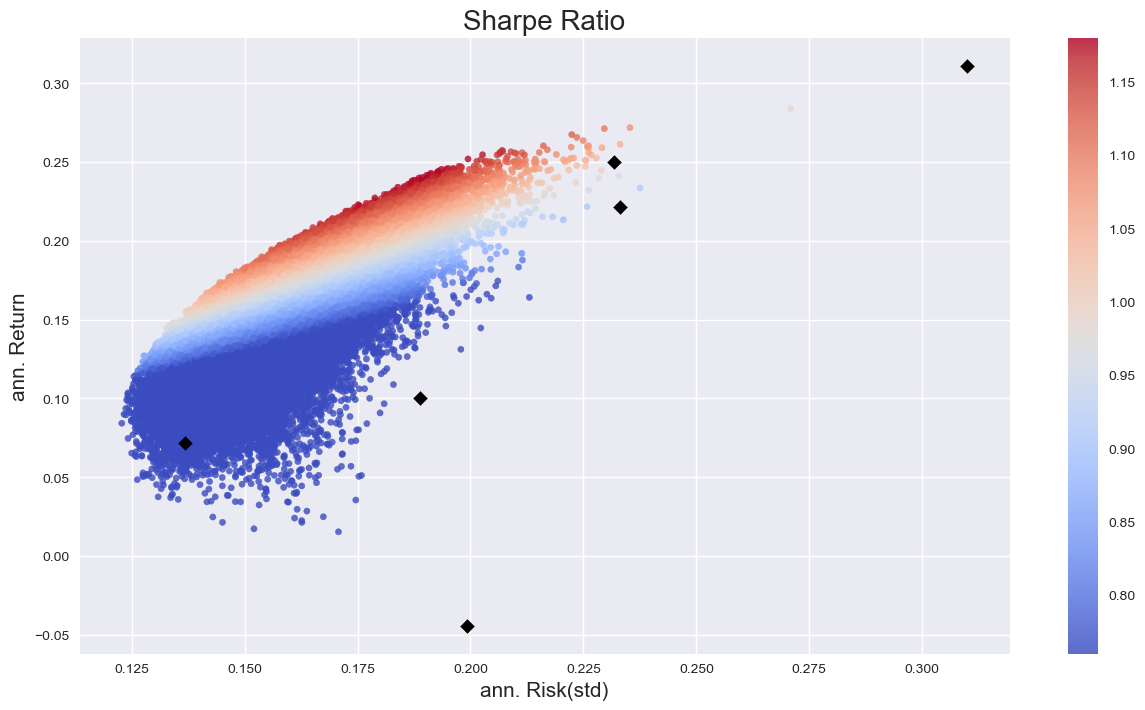

In [58]:
plt.figure(figsize = (15, 8))

plt.scatter(port_summary.loc[:, "Risk"], # risk
            port_summary.loc[:, "Return"], # return
            s = 20, 
            c = port_summary.loc[:, "Sharpe"], # color - by the sharp ration 
            cmap = "coolwarm", 
            vmin = 0.76, 
            vmax = 1.18, 
            alpha = 0.8)

plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

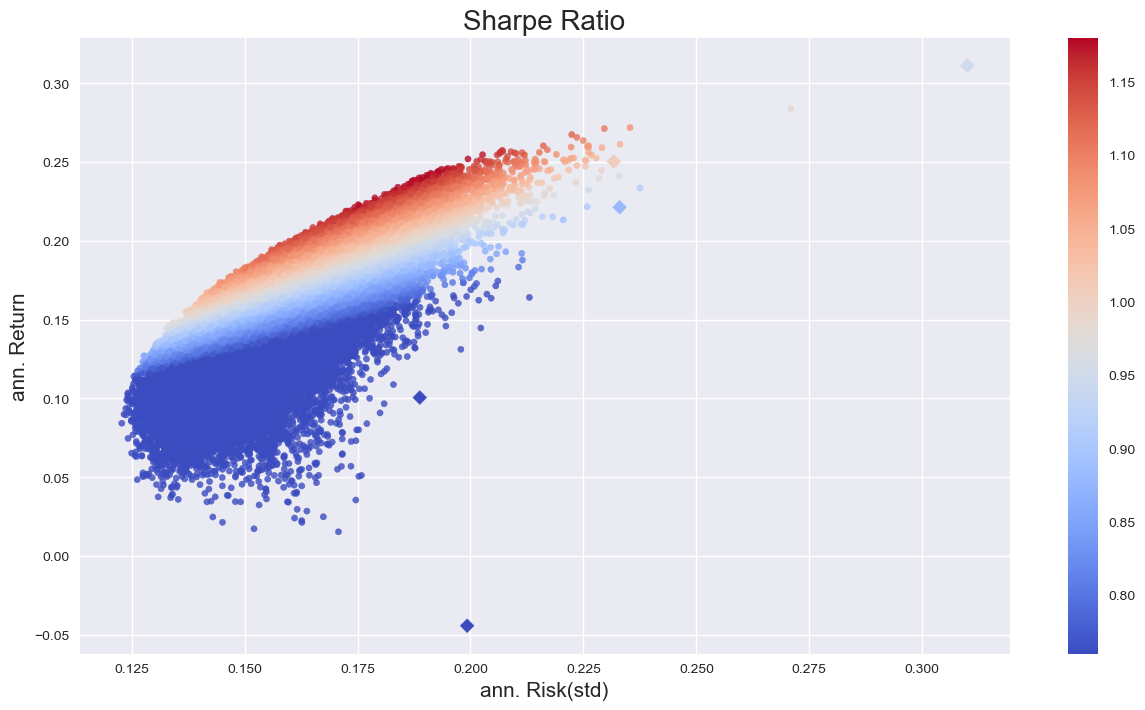

In [59]:
plt.figure(figsize = (15, 8))

# Portfolios
plt.scatter(port_summary.loc[:, "Risk"], 
            port_summary.loc[:, "Return"], 
            s= 20, 
            c = port_summary.loc[:, "Sharpe"], 
            cmap = "coolwarm", 
            vmin = 0.76, 
            vmax = 1.18, 
            alpha = 0.8)

# Instruments (the 6 stocks)
plt.scatter(summary.loc[:, "Risk"], 
            summary.loc[:, "Return"],
            s= 50, 
            marker = "D",
            c = summary.loc[:, "Sharpe"], 
            cmap = "coolwarm", 
            vmin = 0.76, 
            vmax = 1.18)

plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

# This proof us, that invest in single instrument,
# will not give us the best sharp ratio. 

---

# Finding the optimal Portfolio - The "Max Sharpe Ratio Portfolio"

In [60]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1502,0.1534,0.8683
1,0.1925,0.1712,1.0250
2,0.1075,0.1588,0.5696
3,0.1325,0.1466,0.7874
4,0.1959,0.1724,1.0380


In [61]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1517,0.1565,0.8550
std,0.0307,0.0125,0.1540
min,0.0154,0.1228,-0.0093
25%,0.1316,0.1476,0.7612
50%,0.1517,0.1553,0.8678
75%,0.1722,0.1640,0.9696
max,0.2838,0.2709,1.1820


In [62]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [64]:
# The index that hold the maximum sharp ratio portfolio
msrp = port_summary.Sharpe.idxmax()
msrp

68826

In [65]:
# The risk and return of the optimal sharp ratio portfolio
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.2399
Risk     0.1886
Sharpe   1.1820
Name: 68826, dtype: float64

In [69]:
# This is the weigths of the optimal sharp ratio portfolio
msrp_w = weights[msrp, :]
print(msrp_w)
print(msrp_w.sum())

[0.25239442 0.32584579 0.01031831 0.00973711 0.06671478 0.3349896 ]
1.0


In [70]:
# This is the weigths and the corresponding instrument of the optimal 
# sharp ratio portfolio
pd.Series(index = stocks.columns, data = msrp_w)

AMZN   0.2524
BA     0.3258
DIS    0.0103
IBM    0.0097
KO     0.0667
MSFT   0.3350
dtype: float64

In [71]:
opt_weights = pd.Series(index = stocks.columns,
                         data = np.array([2.59608281e-01, 
                                          3.48750774e-01,
                                          2.42861287e-17, 
                                          5.20417043e-18, 
                                          8.89045781e-17, 
                                          3.91640945e-01]))

In [72]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [73]:
# Compute the return of the maximum portfolio
ret["MP"] = ret.dot(opt_weights)

In [74]:
# The return of the instruments,
# and also the returns of the maximum sharp rationportfolio
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0012
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0112
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,0.0001


In [79]:
summary = ann_risk_return(ret)

In [80]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]

In [81]:
summary

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070
MP,0.2560,0.1998,1.1966


__Plot the optimal sharp ratio portfolio, the instrumets and the others portfolios__

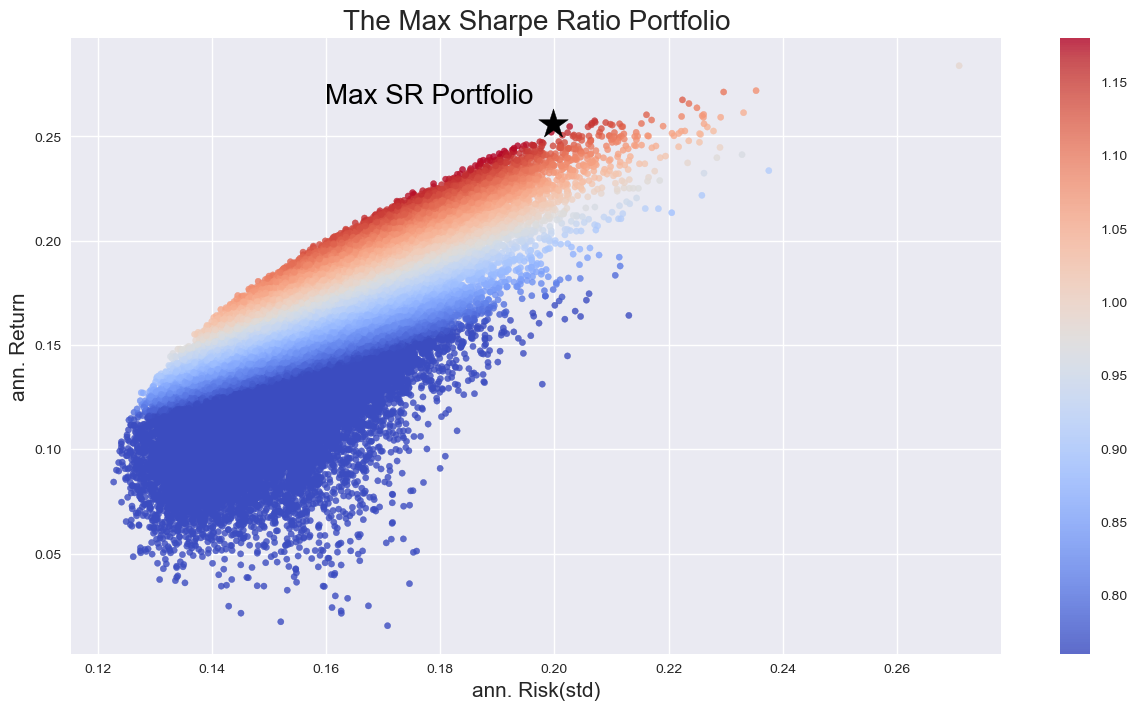

In [78]:
plt.figure(figsize = (15, 8))

# Plot the portfolios
plt.scatter(port_summary.loc[:, "Risk"], 
            port_summary.loc[:, "Return"], 
            s= 20, 
            c = port_summary.loc[:, "Sharpe"], 
            cmap = "coolwarm", 
            vmin = 0.76, 
            vmax = 1.18, 
            alpha = 0.8)

plt.colorbar()

# Plot the optimal sharp ratio portfolio
plt.scatter(summary.loc["MP", "Risk"], 
            summary.loc["MP", "Return"],
            s= 500, 
            c = "black", 
            marker = "*")

# adding a text to the optimal sharp ratio portfolio
plt.annotate("Max SR Portfolio", 
             xy=(summary.loc["MP", "Risk"]-0.04,    # locate x 
                 summary.loc["MP", "Return"]+0.01), # locate y
             size = 20, 
             color = "black")

plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

---

# The Sharpe Ratio - a graphical intuition (PP)

In [86]:
rf[0]

0.017

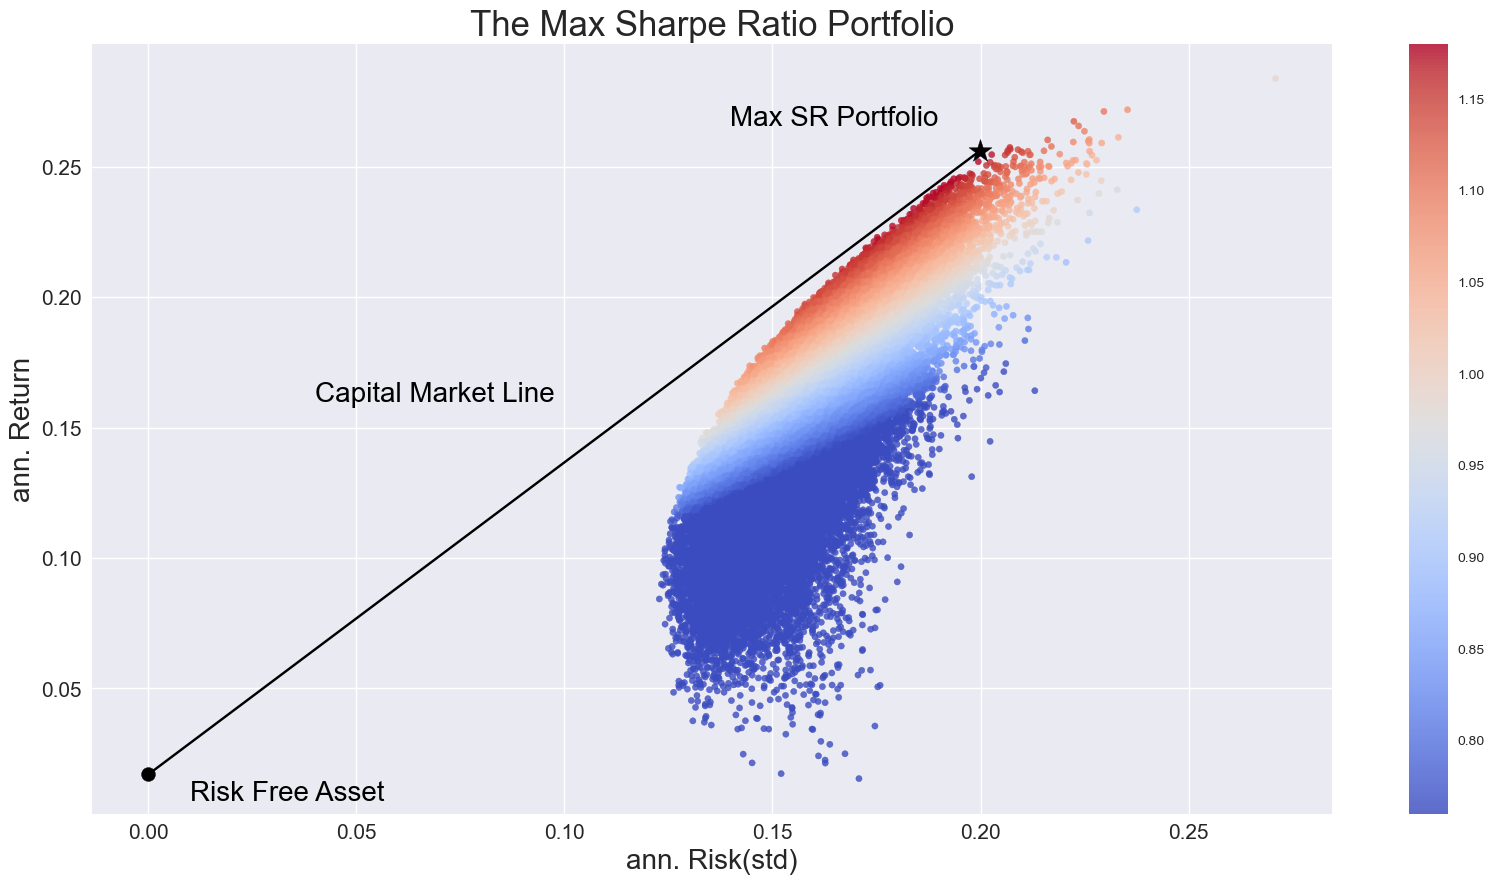

In [85]:
plt.figure(figsize = (20, 10))

# Plot the 10000 portfolios
plt.scatter(port_summary.loc[:, "Risk"],   # risk 
            port_summary.loc[:, "Return"], # return
            s= 20, 
            c = port_summary.loc[:, "Sharpe"], # color map by their sharp ratio
            cmap = "coolwarm", vmin = 0.76,  vmax = 1.18, alpha = 0.8)
plt.colorbar()

# Plot the optimal sharp ratio portfolio (the star)
plt.scatter(summary.loc["MP", "Risk"],  # risk
            summary.loc["MP", "Return"],# returh
            s= 300, 
            c = "black", 
            marker = "*") # as star

# Plot text and locate it close to the optimal sharp ratio portfolio
plt.annotate("Max SR Portfolio", 
             xy=(summary.loc["MP", "Risk"]-0.06, 
                 summary.loc["MP", "Return"]+0.01), 
                 size = 20, 
                 color = "black")

# locate a dot for represent the risk free return 
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")

# locate a text where the dot for represent the risk free return
plt.annotate("Risk Free Asset", 
             xy = (rf[1] + 0.01, rf[0] - 0.01), 
             size = 20, 
             color = "black")

plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)

plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)

# Plot the capital line from the risk free return to the optimal sharp ratio
plt.plot([rf[1],summary.loc["MP", "Risk"]],  
          [rf[0],summary.loc["MP", "Return"]], 
          c = "black")

plt.annotate("Capital Market Line", 
             xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

---

# Capital Market Line & Two-Fund-Theorem (PP)

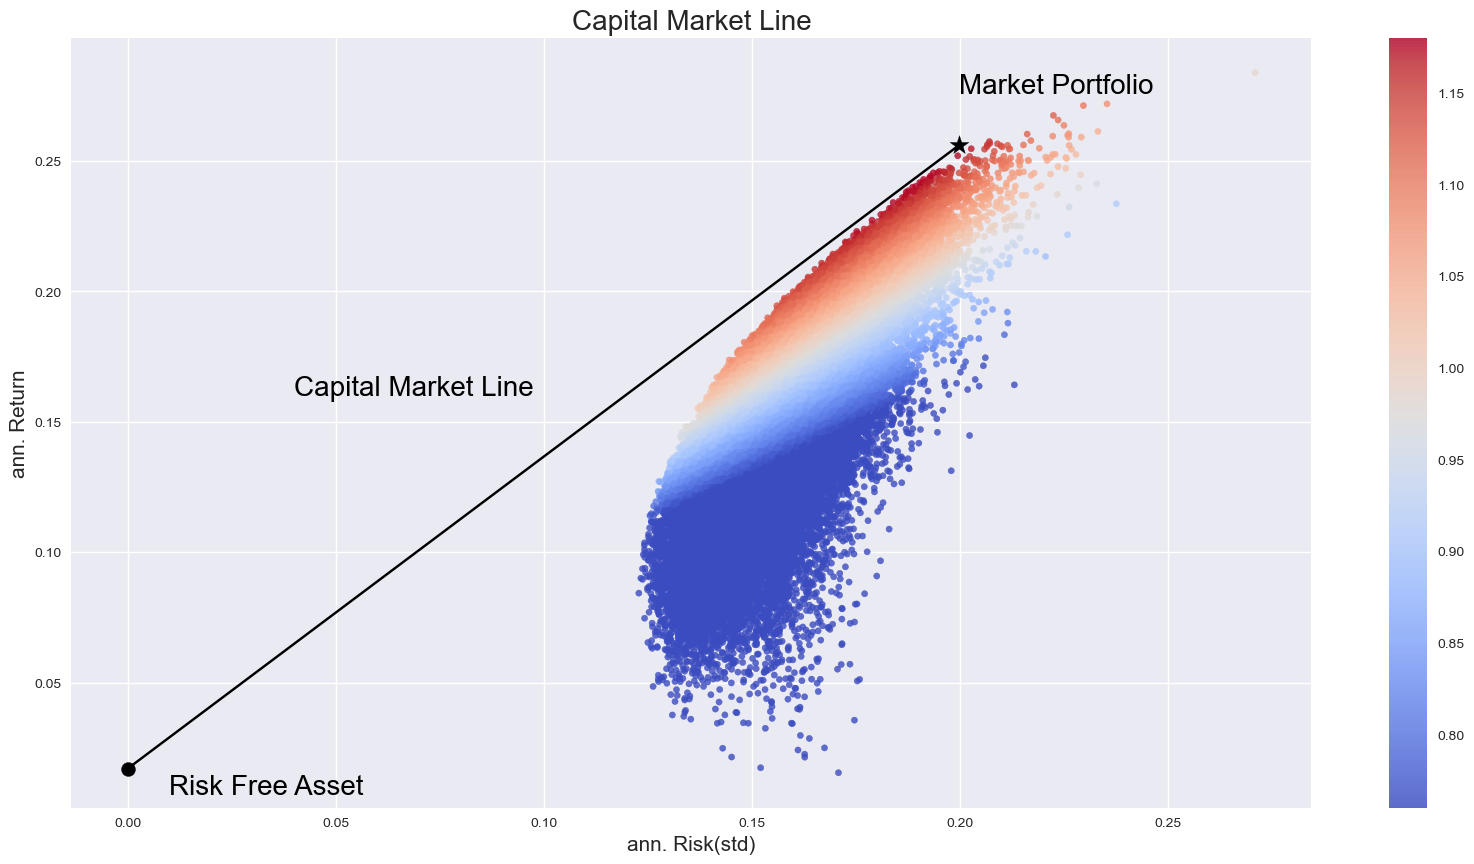

In [91]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()

--------------------------------------

# The Portfolio Diversification Effect

In [87]:
summary

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070
MP,0.2560,0.1998,1.1966


In [88]:
# this is actually the weighted average return and the
# weighted average risk for our constituents of our best portfolio
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [89]:
# this is the return and the risk of MSFT only
weighted_av = summary.loc[:"MSFT", ["Return", "Risk"]].T.dot(opt_weights)
weighted_av

Return   0.2560
Risk     0.2525
dtype: float64

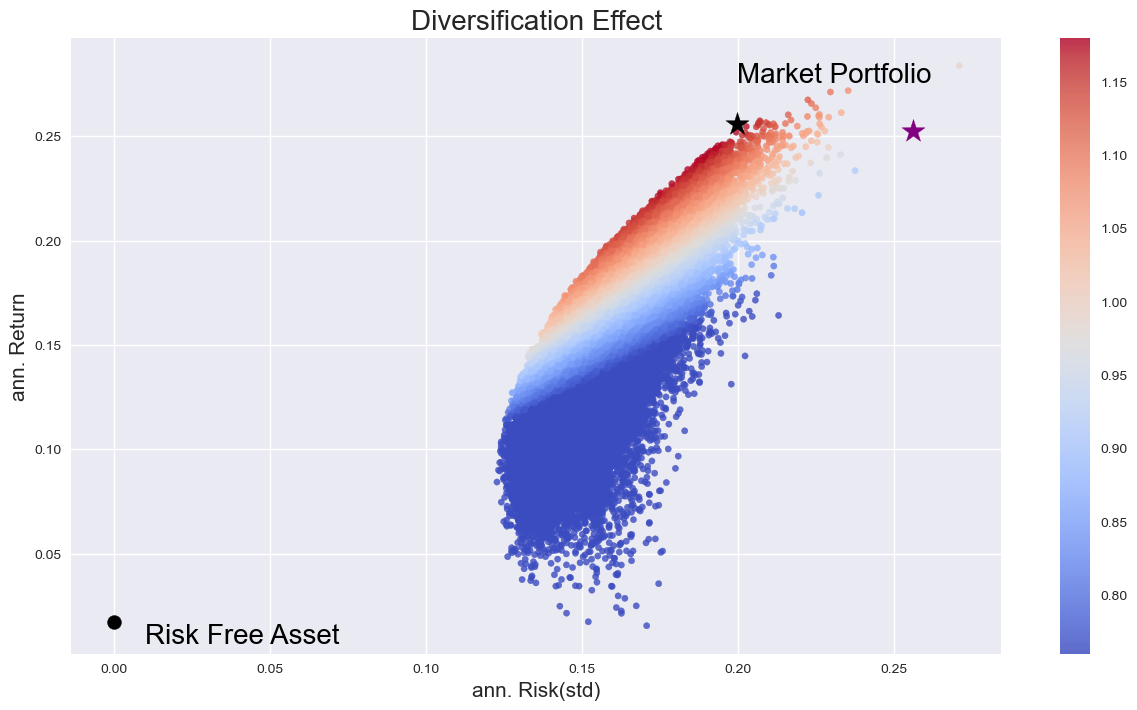

In [90]:
# Plot the portfolios, the best portfolio, and weighted avarage portfolio


plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.loc["MP", "Risk"], summary.loc["MP", "Return"]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.scatter(weighted_av.Return, weighted_av.Risk,s= 300, c = "purple", marker = "*")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Diversification Effect", fontsize = 20)
plt.show()

# You can see clearly the diversification effect:
# the market portfolio have diversification, and in the other hand,
# the weighted avarage portfolio (that contaon only MSFT stock), have more
# risk. 


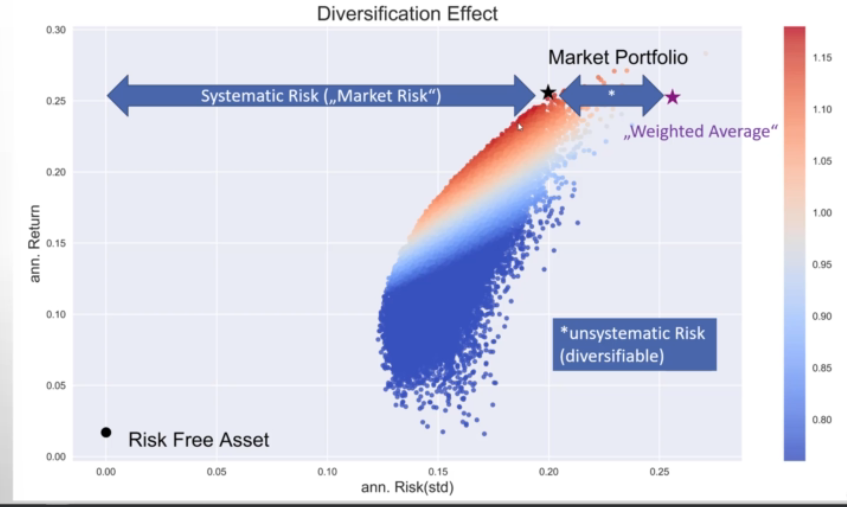

__Let's make an easy example__

In [92]:
# three stocks and their returns
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

,A,B,C
1,0.0500,0.0500,0.1000
2,0.1000,0.0000,0.2000
3,-0.0200,0.1200,-0.0400
4,0.0400,0.0600,0.0800
5,0.0600,0.0400,0.1200
6,-0.0400,0.1400,-0.0800
7,0.0300,0.0700,0.0600
8,0.1500,-0.0500,0.3000
9,0.0600,0.0400,0.1200
10,0.0200,0.0800,0.0400


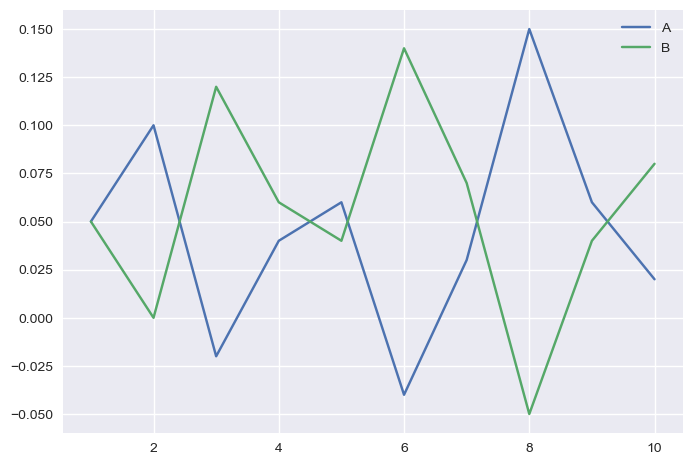

In [98]:
# Plot the returns of A and B
three_stocks.loc[:, ["A", "B"]].plot()
plt.show()

# A and B are negative correlated

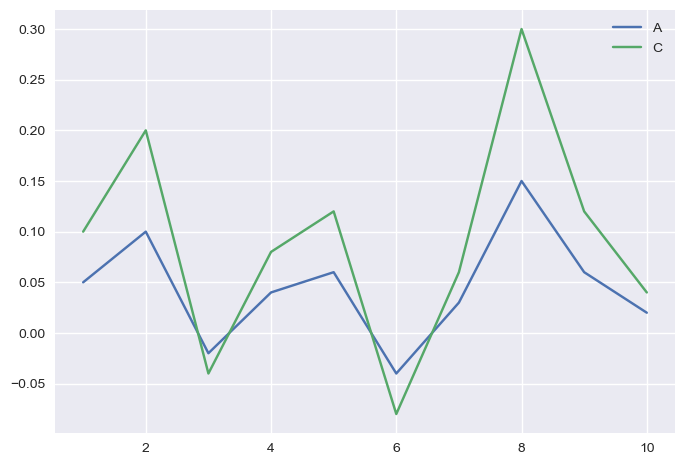

In [108]:
# Plot the returns of A and C
three_stocks.loc[:, ["A", "C"]].plot()
plt.show()

# A and C are positive correlated

In [99]:
# Compute the correlation between the instruments
three_stocks.iloc[:, :3].corr()

,A,B,C
A,1.0000,-1.0000,1.0000
B,-1.0000,1.0000,-1.0000
C,1.0000,-1.0000,1.0000


In [100]:
# Create portfolio of A and B (EWI)
# Calculate the mean return of A and B
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [101]:
# Create portfolio of A and C (EWI)
# Calculate the mean return of A and C
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

In [102]:
# Plot the returns of A,B,C and the two EWI: AB, AC
three_stocks

,A,B,C,AB,AC
1,0.0500,0.0500,0.1000,0.0500,0.0750
2,0.1000,0.0000,0.2000,0.0500,0.1500
3,-0.0200,0.1200,-0.0400,0.0500,-0.0300
4,0.0400,0.0600,0.0800,0.0500,0.0600
5,0.0600,0.0400,0.1200,0.0500,0.0900
6,-0.0400,0.1400,-0.0800,0.0500,-0.0600
7,0.0300,0.0700,0.0600,0.0500,0.0450
8,0.1500,-0.0500,0.3000,0.0500,0.2250
9,0.0600,0.0400,0.1200,0.0500,0.0900
10,0.0200,0.0800,0.0400,0.0500,0.0300


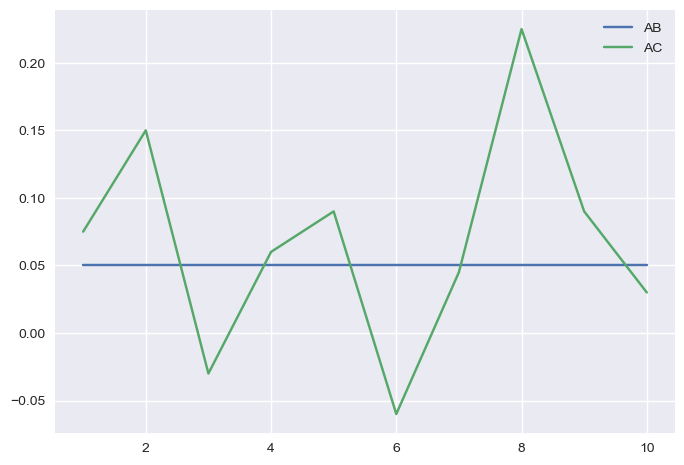

In [103]:
# Let's plot the return of both portfolios: AB, AC. 
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

# Interpretation:
# you can see that AB more stable return, than AC.

In [109]:
summ = three_stocks.agg(["mean", "std"])
summ.T

,mean,std
A,0.0450,0.0546
B,0.0550,0.0546
C,0.0900,0.1092
AB,0.0500,0.0000
AC,0.0675,0.0819


In [105]:
summ[["A", "B"]].mean(axis = 1)

mean   0.0500
std    0.0546
dtype: float64

In [106]:
summ[["A", "C"]].mean(axis = 1)

mean   0.0675
std    0.0819
dtype: float64

In [114]:
ret.corr()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,1.0000,0.3617,0.3412,0.3000,0.2117,0.5331,0.7922
BA,0.3617,1.0000,0.4186,0.4096,0.3141,0.4112,0.7394
DIS,0.3412,0.4186,1.0000,0.3896,0.3236,0.4048,0.4917
IBM,0.3000,0.4096,0.3896,1.0000,0.3364,0.4648,0.4987
KO,0.2117,0.3141,0.3236,0.3364,1.0000,0.3394,0.3673
MSFT,0.5331,0.4112,0.4048,0.4648,0.3394,1.0000,0.8364
MP,0.7922,0.7394,0.4917,0.4987,0.3673,0.8364,1.0000


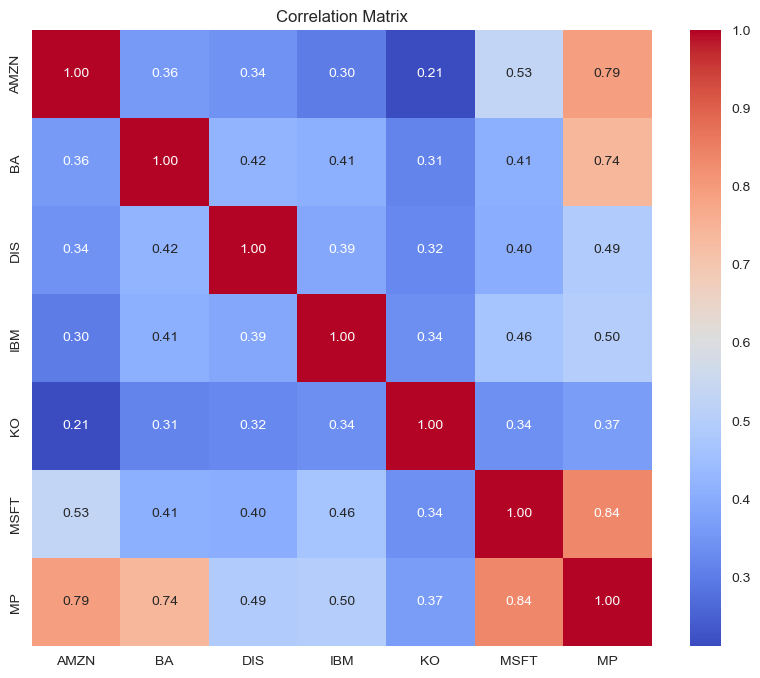

In [115]:
import seaborn as sns

correlation_matrix = ret.corr()
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

__Take Home Msg__ 
> Where the stocks in the portfolio perfectly (or higly) negative/positive correlated - __there is no diversification effect__!

----

# Systematic vs. unsystematic (diversifiable) Risk

- > each stock contains __unsystematic__ risk that can be diversified when putting the stock into a portfolio and __systematic__ risk that cannot be diversified.
- > we will split the total risk of our constituents stocks into a systematic and unsystematic.

The goal is reduce the unsystematic risk.

__Note:__
-  simple arithmetic operations like addition and multiplication with the standard deviation are matematically wrong.
- when we have the risk in variance units, it is the mathematically correct to perform arithmetics
    -  that's exactly the reason why w'll use the variance instead of the standard deviation.

In [116]:
summary
# instruments, their risk, return, and sharp ratio

,Return,Risk,Sharpe
AMZN,0.3111,0.3100,0.9489
BA,0.2214,0.2330,0.8771
DIS,0.1006,0.1888,0.4428
IBM,-0.0442,0.1993,-0.3071
KO,0.0717,0.1368,0.3997
MSFT,0.2504,0.2317,1.0070
MP,0.2560,0.1998,1.1966


In [117]:
# Variance
summary["TotalRisk_var"] = np.power(summary.Risk, 2)

In [118]:
summary

,Return,Risk,Sharpe,TotalRisk_var
AMZN,0.3111,0.3100,0.9489,0.0961
BA,0.2214,0.2330,0.8771,0.0543
DIS,0.1006,0.1888,0.4428,0.0356
IBM,-0.0442,0.1993,-0.3071,0.0397
KO,0.0717,0.1368,0.3997,0.0187
MSFT,0.2504,0.2317,1.0070,0.0537
MP,0.2560,0.1998,1.1966,0.0399


In [119]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0012
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0112
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,0.0001


In [120]:
# Calculate the annualize risk variance of the instruments!
COV = ret.cov()*252

In [121]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,0.0961,0.0261,0.0200,0.0185,0.0090,0.0383,0.0491
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0344
DIS,0.0200,0.0184,0.0356,0.0147,0.0084,0.0177,0.0185
IBM,0.0185,0.0190,0.0147,0.0397,0.0092,0.0215,0.0198
KO,0.0090,0.0100,0.0084,0.0092,0.0187,0.0108,0.0100
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537,0.0387
MP,0.0491,0.0344,0.0185,0.0198,0.0100,0.0387,0.0399


In [122]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [123]:
# Calculate the variance of the optimal weigths portfolio:
COV.iloc[:-1, -1].dot(opt_weights)

0.03990123717354594

In [124]:
# The covariance of the optimal portfolio... 
COV.iloc[-1, -1]

0.03990123717354595

In [125]:
# The systematic risk = the variance between each stock and the index!
summary["SystRisk_var"] = COV.iloc[:, -1]

In [126]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var
AMZN,0.3111,0.3100,0.9489,0.0961,0.0491
BA,0.2214,0.2330,0.8771,0.0543,0.0344
DIS,0.1006,0.1888,0.4428,0.0356,0.0185
IBM,-0.0442,0.1993,-0.3071,0.0397,0.0198
KO,0.0717,0.1368,0.3997,0.0187,0.0100
MSFT,0.2504,0.2317,1.0070,0.0537,0.0387
MP,0.2560,0.1998,1.1966,0.0399,0.0399


In [127]:
# and the unsystematic risk, is the different between:
# Total risk - Systematic risk.
# this can be reduce!
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])

In [128]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.3111,0.3100,0.9489,0.0961,0.0491,0.0470
BA,0.2214,0.2330,0.8771,0.0543,0.0344,0.0199
DIS,0.1006,0.1888,0.4428,0.0356,0.0185,0.0171
IBM,-0.0442,0.1993,-0.3071,0.0397,0.0198,0.0199
KO,0.0717,0.1368,0.3997,0.0187,0.0100,0.0087
MSFT,0.2504,0.2317,1.0070,0.0537,0.0387,0.0150
MP,0.2560,0.1998,1.1966,0.0399,0.0399,-0.0000


> __The Index risk, its basically the weigthed avarage of the systematic risk of its constituents!__

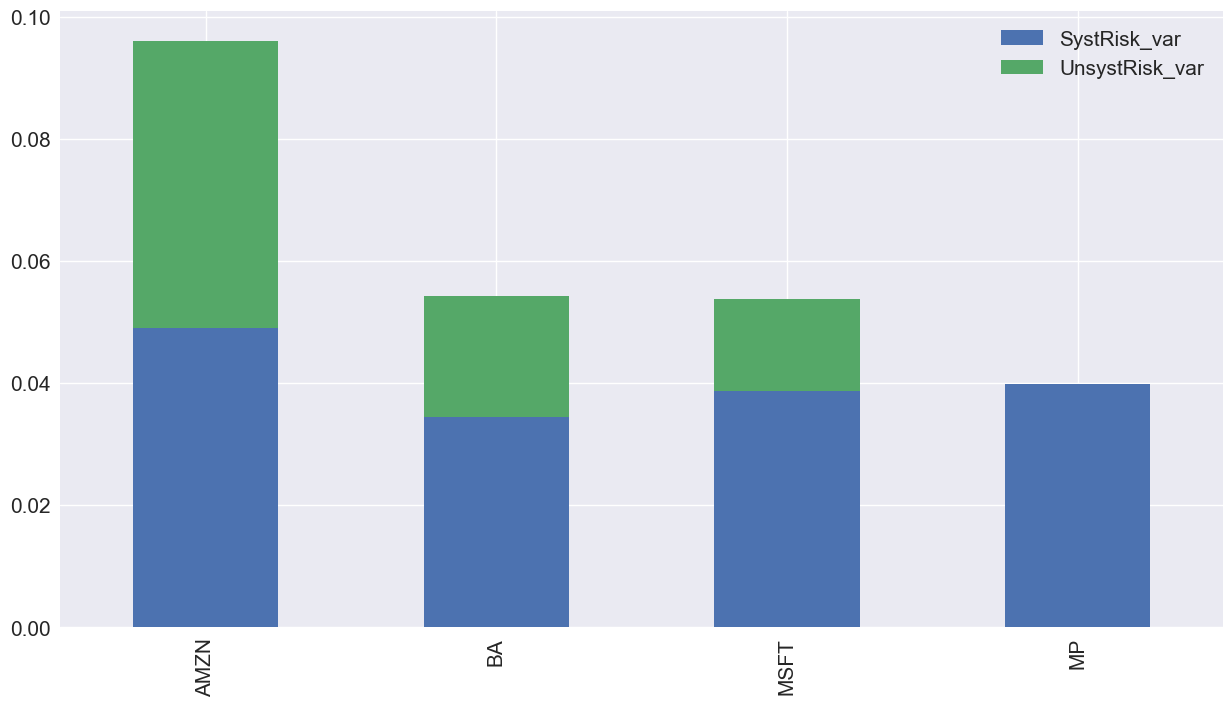

In [129]:
# Plot the systematic risk and the unsystematic risk. 
summary.iloc[[0, 1, 5, 6], 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# unsystematic risk -> can be reduce
# systematic risk -> cannot be reduce

# by the diversification effect, we success to reduce the unsystenatic risk.

__Plot the Total risk and the return__
> __Remember, the unsystematic risk can be reduce__


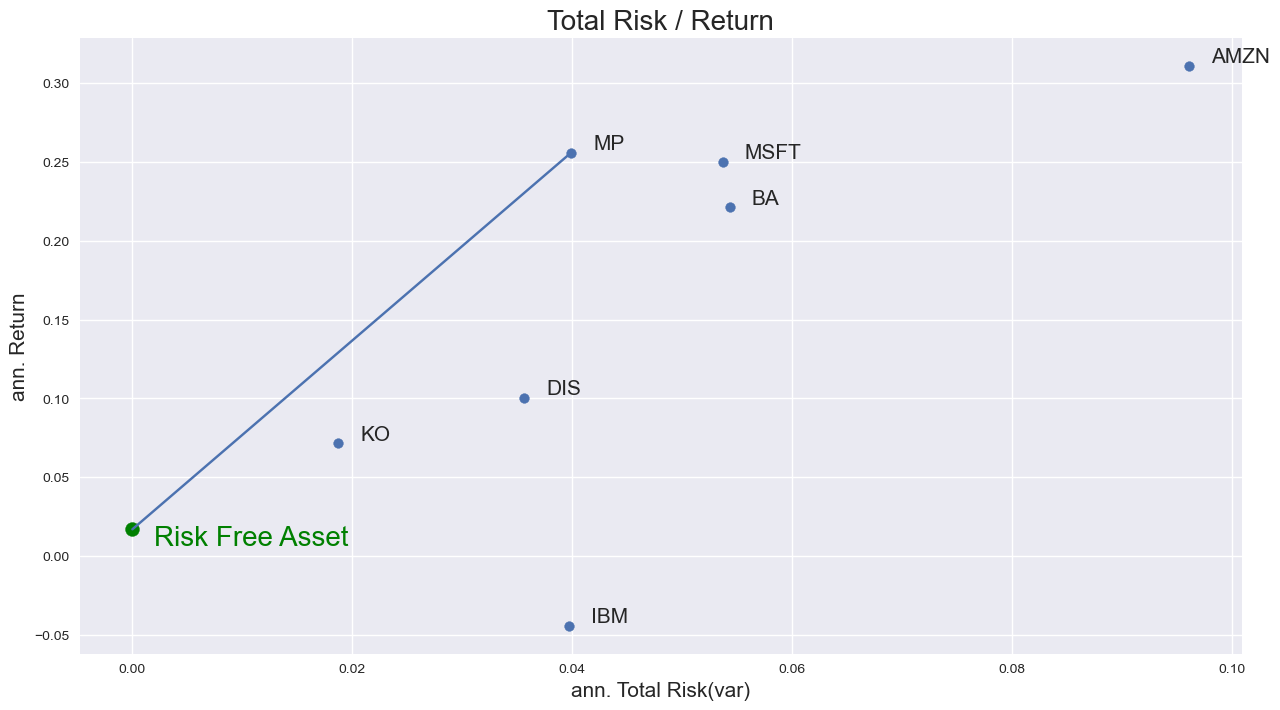

In [130]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

__We reduce the unsystematic risk!__

__Now, this is the return and the systematic risk only.__

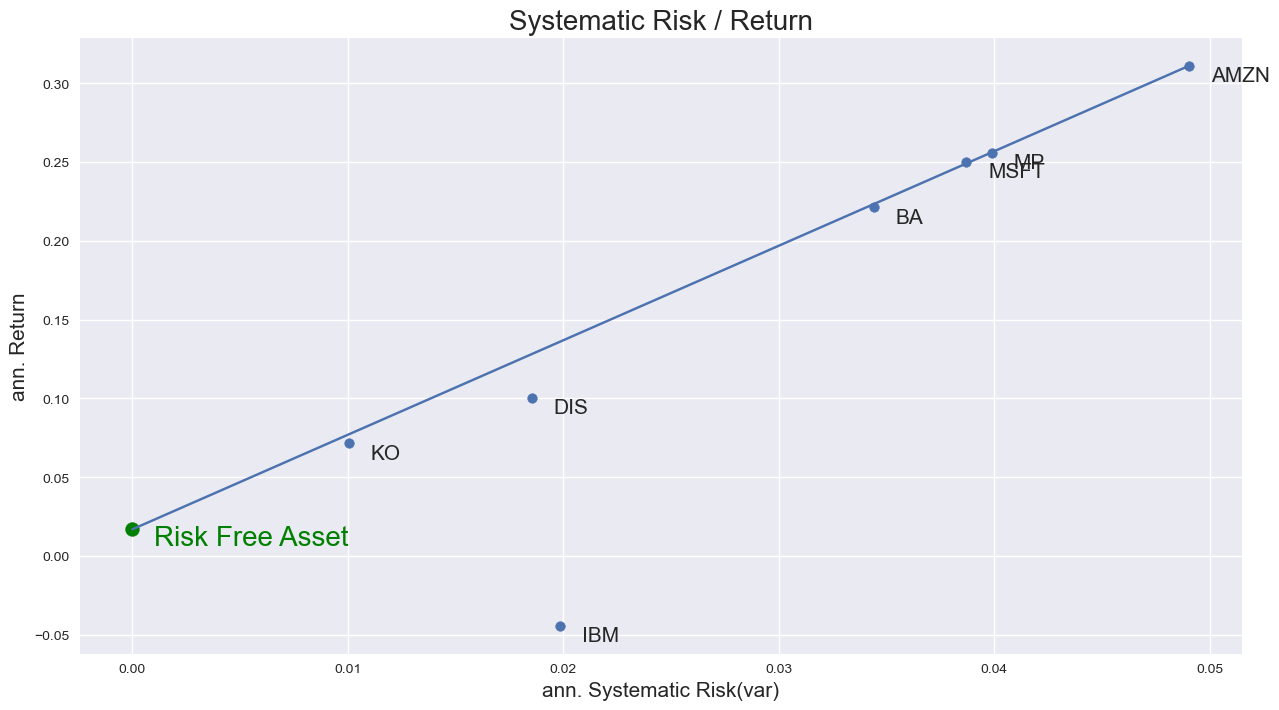

In [131]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

> Again, __The Index risk, its basically the weigthed avarage of the systematic risk of its constituents!__

---

# CAPM & the Security Market Line

In [132]:
pd.options.display.float_format = '{:.2f}'.format

In [133]:
summary
# For each instrument we have:
# the return, risk, sharp ratio, variance, systematic & unsystematic risk. 

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.31,0.31,0.95,0.10,0.05,0.05
BA,0.22,0.23,0.88,0.05,0.03,0.02
DIS,0.10,0.19,0.44,0.04,0.02,0.02
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02
KO,0.07,0.14,0.40,0.02,0.01,0.01
MSFT,0.25,0.23,1.01,0.05,0.04,0.01
MP,0.26,0.20,1.20,0.04,0.04,-0.00


In [134]:
# normalize (by divide each systematic variance by the market portfolio variance)
# so we just normalize the covariance of the systematic risk... 
summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

AMZN   1.23
BA     0.86
DIS    0.46
IBM    0.50
KO     0.25
MSFT   0.97
MP     1.00
Name: SystRisk_var, dtype: float64

In [135]:
# Actualy, this is called the beta!
# again, 
# normalize (by divide each systematic variance by the market portfolio variance)
# so we just normalize the covariance of the systematic risk... 
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [136]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00


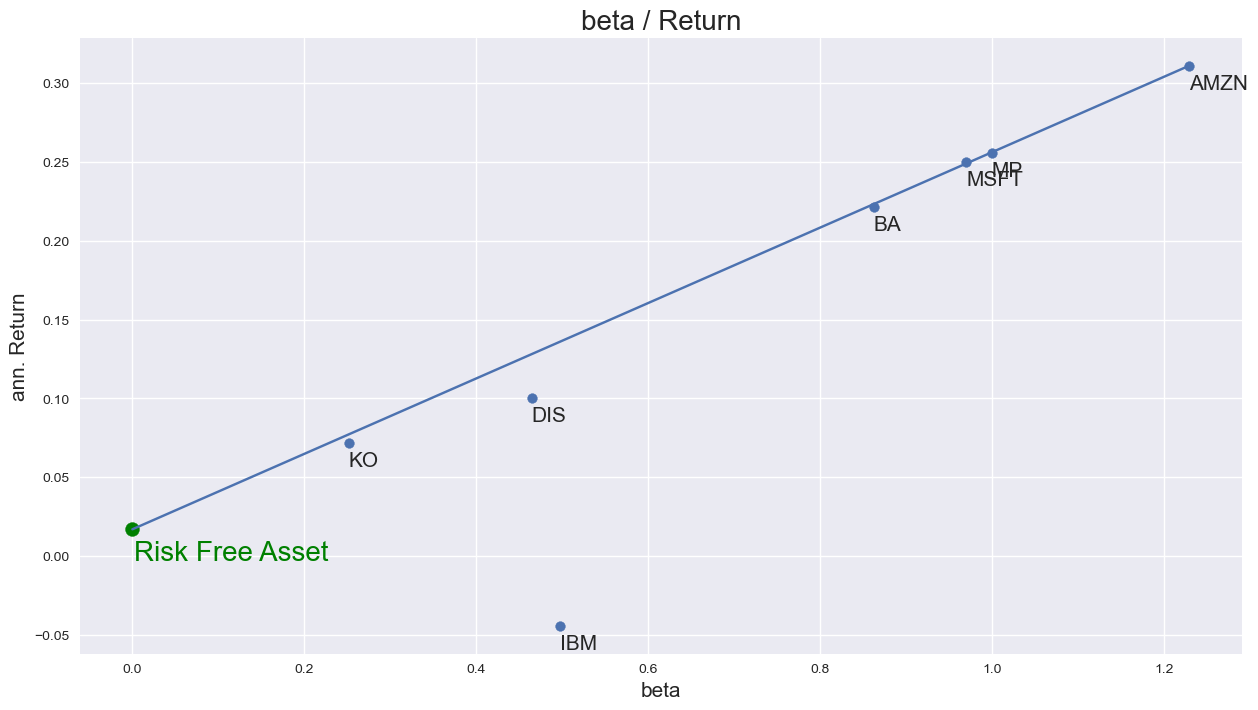

In [137]:
# Plot the beta and return on the security line 
# This is the capital market line
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, 
                        summary.loc[i, "Return"]-0.015), 
                        size = 15)

plt.plot([rf[1], summary.loc["AMZN", "beta"]], 
         [rf[0], summary.loc["AMZN", "Return"]])

plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", 
             xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")

plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()


# Beta: 
# where the beta of an instrument == 1 --> the instrument behave like the index.

$y = i + slope * x$

__Capital Asset Pricing Model formula:__
> The Capital Asset Pricing Model (CAPM) is a financial model that establishes a linear relationship between the expected return of an asset and its systematic risk. 

$Return = RFR + (\text{Market Portfolio Return - RFR}) * beta$

In [138]:
rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.loc["AMZN", "beta"]

# Interpretation:
# the CAPM helps investors assess whether the expected return of an
# investment adequately compensates for the level of risk it carries.

0.3108716289702305

In [139]:
# Compute the CAPM return for each stock:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

#  this represents the expected return on the investment 
#  according to the Capital Asset Pricing Model.

# Let's take AMZN for example, 
# according to the model, investors would anticipate a return
# of approximately 31.09% on Amazon, taking into account the risk-free rate,
# the beta of Amazon, and the expected market return.

# Beta, is also the slope.

In [140]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50,0.14
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25,0.08
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97,0.25
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00,0.26


> __By the CAPM formula, we can calculate the required return of a stock given its systematic risk__

----

# Beta and Alpha
- __Alpha__: whether the stock __out/under perform__ the __Security line__  

In [152]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31,0.00
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22,-0.00
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13,-0.03
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50,0.14,-0.18
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25,0.08,-0.01
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97,0.25,0.00
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00,0.26,0.00


In [150]:
# alpha -> the different between the actual return to the requied return.
# when the alpha > 0: is a good sign.
# when the alpha < 0: is a bad sign.
summary["alpha"] = summary.Return - summary.capm_ret

In [151]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.00
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,0.00


__Plot the relationship between the return of the `market index` to `AMZN`__


c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

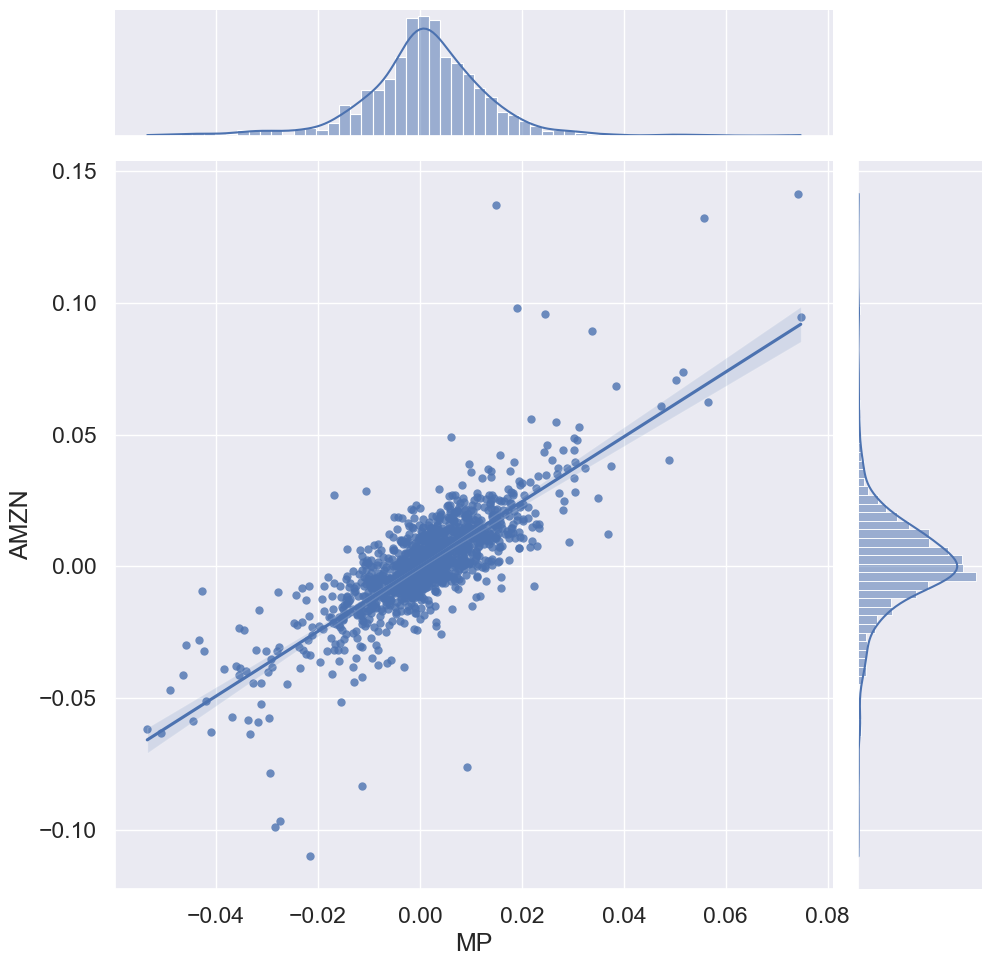

In [149]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MP", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [153]:
# Compute the beta (slop)
np.polyfit(ret.MP, ret.AMZN, 1)

array([ 1.22942099e+00, -1.44444507e-05])

In [146]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

1.2294209860441185

In [147]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AMZN,0.31,0.31,0.95,0.10,0.05,0.05,1.23,0.31,0.00
BA,0.22,0.23,0.88,0.05,0.03,0.02,0.86,0.22,-0.00
DIS,0.10,0.19,0.44,0.04,0.02,0.02,0.46,0.13,-0.03
IBM,-0.04,0.20,-0.31,0.04,0.02,0.02,0.50,0.14,-0.18
KO,0.07,0.14,0.40,0.02,0.01,0.01,0.25,0.08,-0.01
MSFT,0.25,0.23,1.01,0.05,0.04,0.01,0.97,0.25,0.00
MP,0.26,0.20,1.20,0.04,0.04,-0.00,1.00,0.26,0.00


---

# Final Considerations (and a more real world scenario)

In [ ]:
ret.drop(columns = ["MP"], inplace =True)

In [155]:
# the return of the instruments
ret

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [157]:
# The marcet cap weigths 
# this is the weigths of each instrument --> based on its market cap.
# bigger market cap - bigger weigths.
# smaller market cap - smaller weigths.
mcap_weights = pd.read_csv("../Data/mcap_weights.csv", 
                           parse_dates = ["Date"], 
                           index_col = "Date")

In [158]:
mcap_weights

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-02,0.19,0.07,0.13,0.16,0.17,0.28
2014-01-03,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-06,0.19,0.08,0.13,0.16,0.17,0.27
2014-01-07,0.19,0.08,0.13,0.16,0.17,0.27
...,...,...,...,...,...,...
2018-12-21,0.32,0.08,0.09,0.05,0.10,0.36
2018-12-24,0.33,0.08,0.09,0.05,0.10,0.36
2018-12-26,0.33,0.08,0.09,0.05,0.09,0.36


In [159]:
# having the weigths and the daily return, 
# we can calculate the daily returns if VWI (Value Weigted index)
ret["MCAP_P"] = ret.mul(mcap_weights.shift().dropna()).sum(axis = 1)

In [160]:
summary = ann_risk_return(ret)

In [161]:
summary

,Return,Risk
AMZN,0.31,0.31
BA,0.22,0.23
DIS,0.10,0.19
IBM,-0.04,0.20
KO,0.07,0.14
MSFT,0.25,0.23
MCAP_P,0.18,0.17


In [162]:
# Calculate the annuale covariance between the instruments:
COV = ret.cov()*252

In [163]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.10,0.03,0.02,0.02,0.01,0.04,0.04
BA,0.03,0.05,0.02,0.02,0.01,0.02,0.02
DIS,0.02,0.02,0.04,0.01,0.01,0.02,0.02
IBM,0.02,0.02,0.01,0.04,0.01,0.02,0.02
KO,0.01,0.01,0.01,0.01,0.02,0.01,0.01
MSFT,0.04,0.02,0.02,0.02,0.01,0.05,0.04
MCAP_P,0.04,0.02,0.02,0.02,0.01,0.04,0.03


In [164]:
# The systematic risk: the covariance of each instrument and the market index:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [165]:
# calculate the beta:
# systematic risk of each instrumnt / systematic risk of market index  
summary["beta"] = summary.SystRisk_var / summary.loc["MCAP_P", "SystRisk_var"]

In [166]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.04,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.04,1.15
MCAP_P,0.18,0.17,0.03,1.00


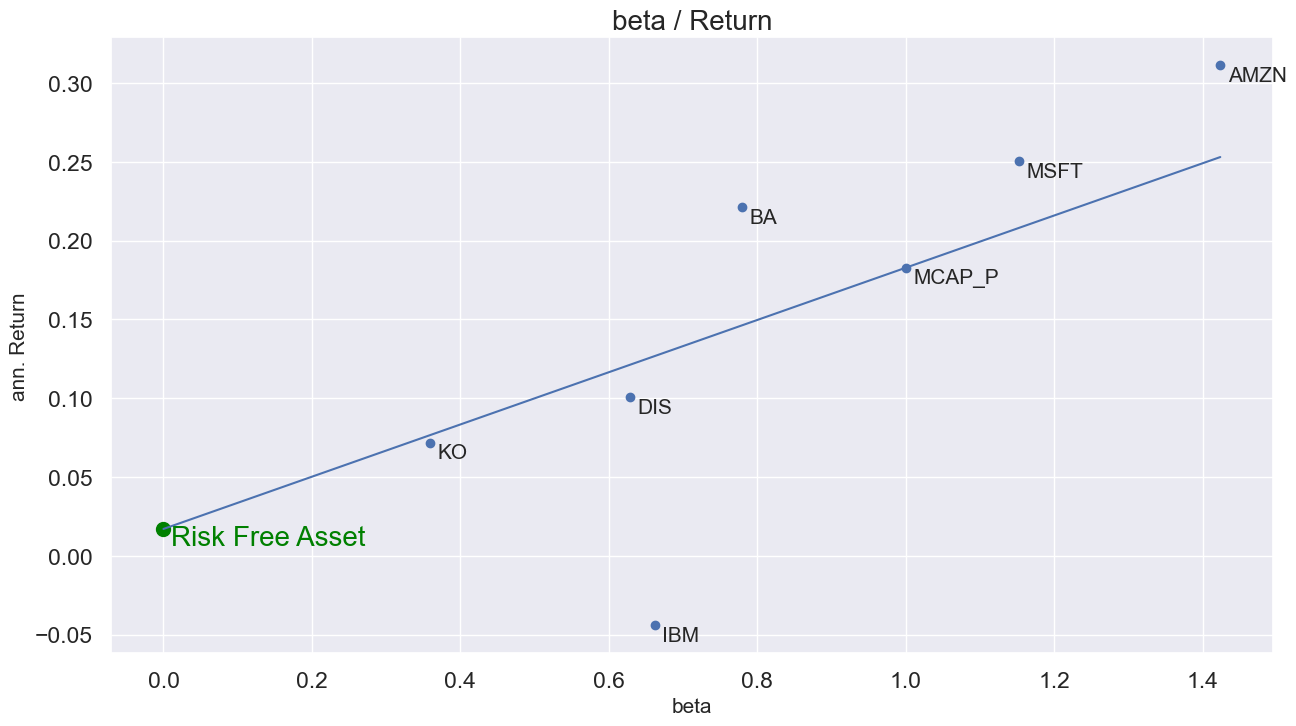

In [167]:
# Plot the relationship between beta and return. 

plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.01, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0],rf[0] + summary.loc["AMZN", "beta"]*(summary.loc["MCAP_P", "Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

---

# Another Intuition on Beta: Cyclical vs. non-Cyclical Stocks
> Cyclical stocks generally perform well when the economy is doing well and tend to underperform during economic downturns.

> typically,  cyclical stocks are typically selling luxury products or very expensive. during economic growth or upswings, these businesses capture most of the increases in spending

In [169]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.00


In [170]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.31,0.31,0.04,1.42
BA,0.22,0.23,0.02,0.78
DIS,0.10,0.19,0.02,0.63
IBM,-0.04,0.20,0.02,0.66
KO,0.07,0.14,0.01,0.36
MSFT,0.25,0.23,0.04,1.15
MCAP_P,0.18,0.17,0.03,1.00


c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

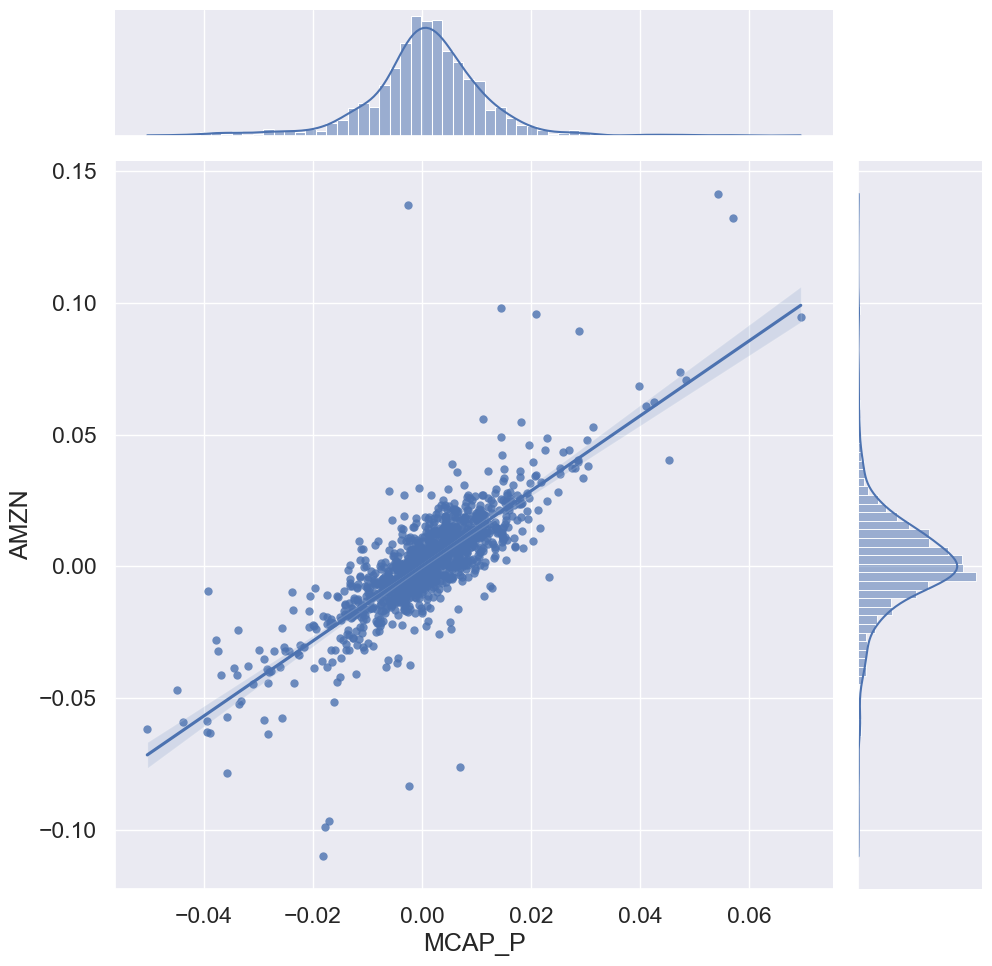

In [171]:
# Plot the portfolio return and the AMZN return.
# ther's a positive correlation.
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [172]:
np.polyfit(ret.MCAP_P, ret.AMZN, 1)

array([1.42372478e+00, 2.02218161e-04])

c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

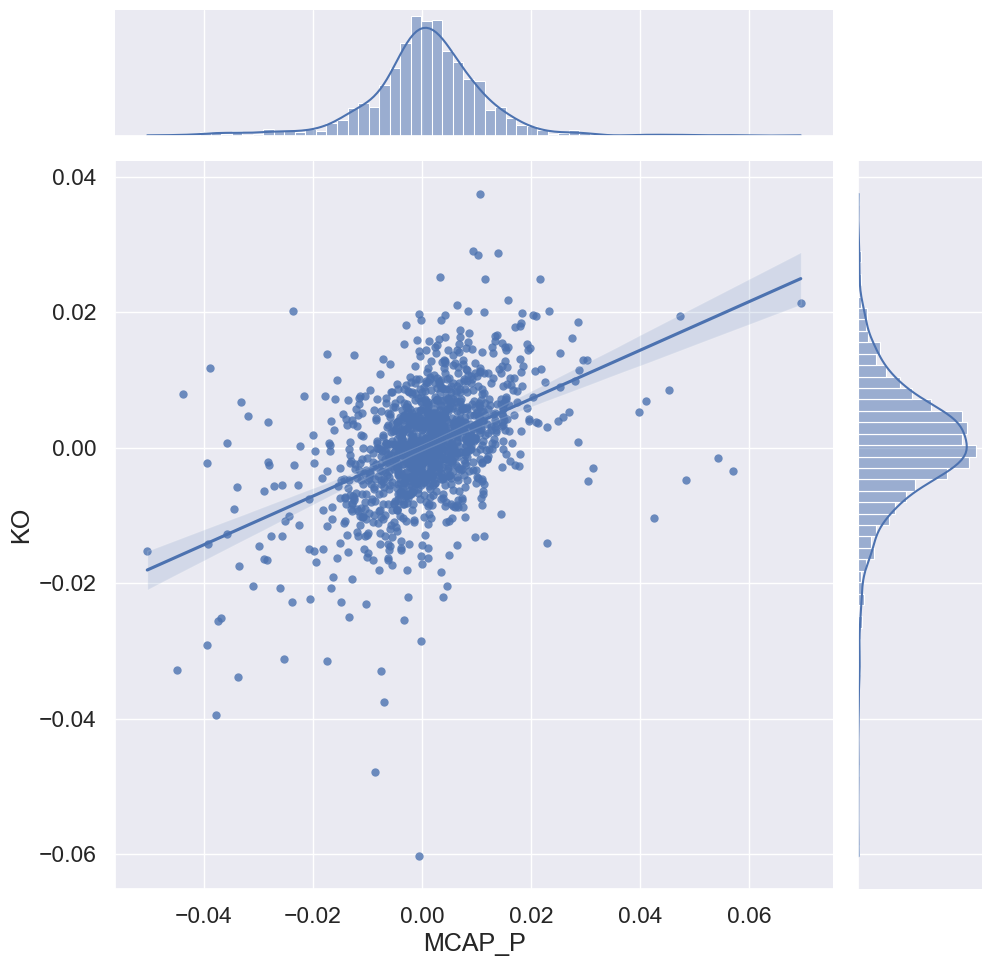

In [173]:
# Plot the portfolio return and the KO return.
# The correlation not higher. 
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "KO", height = 10, kind = "reg")
plt.show()

In [174]:
stocks = yf.download(["AMZN", "KO"], "2007-12-31", "2018-12-31").Close

[*********************100%%**********************]  2 of 2 completed


In [175]:
stocks

,AMZN,KO
Date,,
2007-12-31,4.63,30.68
2008-01-02,4.81,30.55
2008-01-03,4.76,30.86
2008-01-04,4.44,30.92
2008-01-07,4.44,31.66
...,...,...
2018-12-21,68.87,47.57
2018-12-24,67.20,45.96
2018-12-26,73.54,46.94


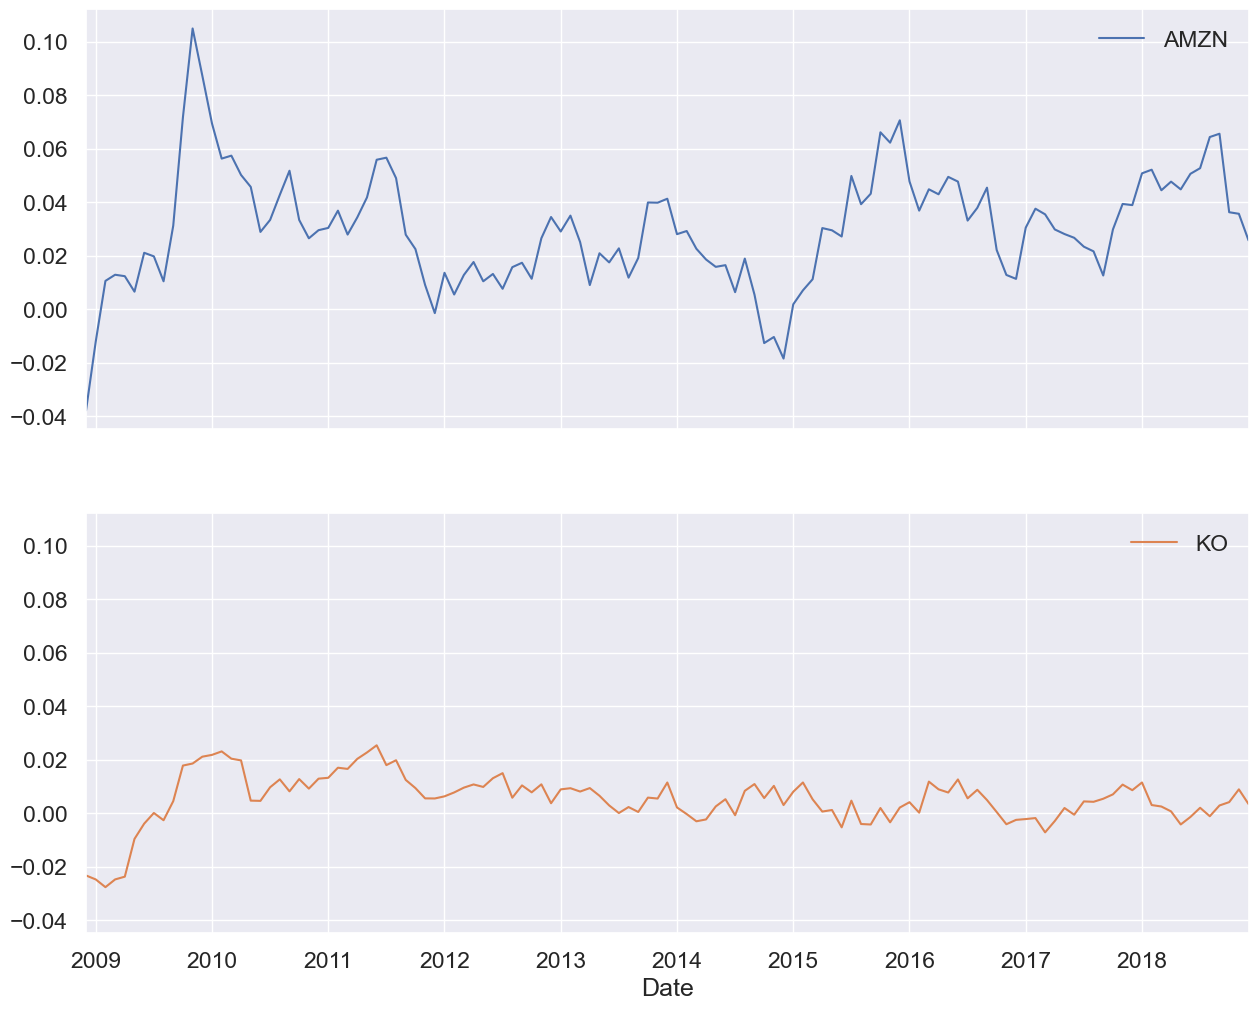

In [176]:
stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)
plt.show()

# Plot the monthly return of AMZN and Coca-Cola

# it's pretty easy to see here that the rolling return for Amazon is a 
# more volatile and it actually overreacts market cycles.
# Coca-Cola we can see it that the rolling returns, 
# the less amplified, slower actually

In [177]:
pd.options.display.float_format = '{:.4f}'.format

> Conclusion: if you want to reduce risk, its good also try to decrease the average Beta effect of the portfolio by investing in defensive stocks. __example__ to defensice stock can be Coca-cola, beacuse allways peapole drinks cola, also economic recession.


---

# Forward-looking Portfolios - 2-Asset Case (Mean-Variance Optimization)

In [178]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0022
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0086
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0100
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0034


In [179]:
two_assets = ret.iloc[:, :2]
two_assets.head()

,AMZN,BA
Date,,
2014-01-03,-0.0038,0.0070
2014-01-06,-0.0071,0.0057
2014-01-07,0.0112,0.0152
2014-01-08,0.0098,0.0022
2014-01-09,-0.0023,0.0093


In [180]:
summ_two = ann_risk_return(two_assets)
summ_two

,Return,Risk
AMZN,0.3111,0.3100
BA,0.2214,0.2330


In [181]:
# The wegiths of our portfolio 
w_AMZN = 0.6 # AMZN weigth
w_BA = 0.4   # BA weigth

ws = np.array([w_AMZN, w_BA])
ws

array([0.6, 0.4])

### Calculating Expected Portfolio Return

In [182]:
# Define the expected return for each stock:
ERet_AMZN = 0.20
ERet_BA = 0.15
ERets = pd.Series({"AMZN": ERet_AMZN, "BA": ERet_BA})
ERets

AMZN   0.2000
BA     0.1500
dtype: float64

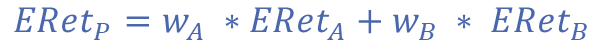

In [183]:
# Calculate the expected return of our portfolio:
# the expected return of each instrument * its weigth.
ERet_P = w_AMZN * ERet_AMZN + w_BA * ERet_BA
ERet_P

0.18

In [184]:
# Calculate the expected return of the index by matrix multiplication
ERets.dot(ws) 

0.18

### Calculating Expected Portfolio Risk

In [185]:
# take the covariance
cov_matrix = two_assets.cov() * 252
cov_matrix

,AMZN,BA
AMZN,0.0961,0.0261
BA,0.0261,0.0543


In [188]:
# amazon covariance
VAR_AMZN = cov_matrix.iloc[0,0]
VAR_AMZN

0.09608881377492147

In [189]:
# BA covariance
VAR_BA = cov_matrix.iloc[1,1]
VAR_BA

0.05430266062705606

In [190]:
# covariance of AMZN & BA
cov_AMZN_BA = cov_matrix.iloc[1,0]
cov_AMZN_BA

0.02612666424926713

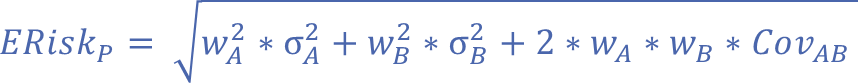

In [191]:
# Compute the expected risk:

ERisk_P = np.sqrt(
    w_AMZN**2 * VAR_AMZN + w_BA**2 * VAR_BA + 2 * w_AMZN * w_BA * cov_AMZN_BA
)
ERisk_P

# This is the expected risk or our portfolio

0.23626510004431234

In [192]:
# Or we can compute the expected risk by metrix multiplication
np.sqrt(cov_matrix.dot(ws).dot(ws))

0.23626510004431237

### Many Random Portfolios

In [193]:
np.random.seed(123)
# Create 10000 portfolios. each portfolio have 2 weigths
matrix = np.random.random(10000 * 2).reshape(10000, 2)

In [194]:
# Normalize the weigths
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [195]:
weights

array([[0.7087962 , 0.2912038 ],
       [0.29152056, 0.70847944],
       [0.62969057, 0.37030943],
       ...,
       [0.52028043, 0.47971957],
       [0.22215611, 0.77784389],
       [0.49742945, 0.50257055]])

In [196]:
# Compute the expected return for each portfolio
Return = ERets.dot(weights.T)
Return

array([0.18543981, 0.16457603, 0.18148453, ..., 0.17601402, 0.16110781,
       0.17487147])

In [197]:
# Compute the expected risk for each portfolio
Risk = np.sqrt((cov_matrix.dot(weights.T).T * weights).sum(axis = 1))
Risk

0      0.2523
1      0.2150
2      0.2403
3      0.2348
4      0.2303
        ...  
9995   0.2643
9996   0.2189
9997   0.2270
9998   0.2159
9999   0.2248
Length: 10000, dtype: float64

In [198]:
# Create a data fram that contain the expected return & risk of each portfolio
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk})
summ

,Return,Risk
0,0.1854,0.2523
1,0.1646,0.2150
2,0.1815,0.2403
3,0.1794,0.2348
4,0.1775,0.2303
...,...,...
9995,0.1889,0.2643
9996,0.1710,0.2189
9997,0.1760,0.2270
9998,0.1611,0.2159


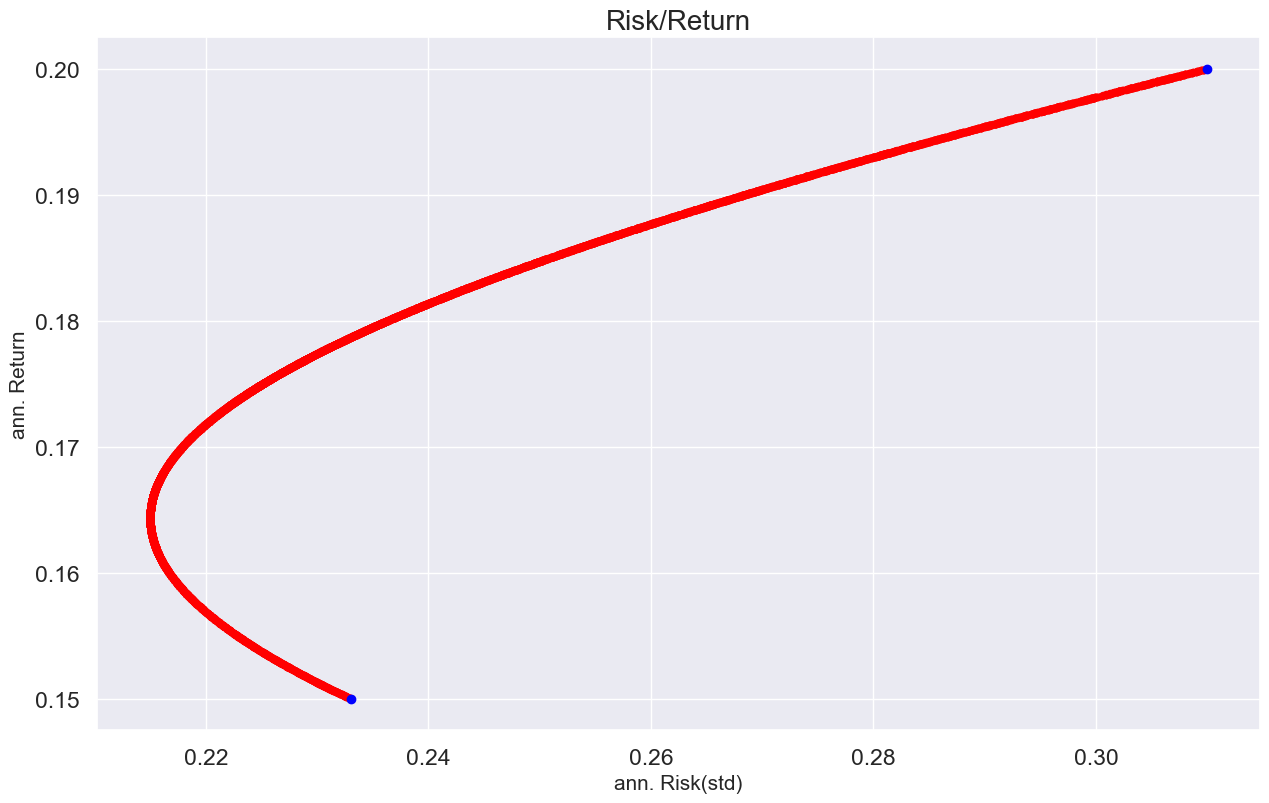

In [199]:
# Plot the expected risk & return for each portfolio:

plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.scatter(summ_two.Risk, ERets, color = "blue")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# Forward-looking Portfolios - not that simple

In [200]:
# The return of the instruments
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-03,-0.0038,0.0070,-0.0021,0.0060,-0.0049,-0.0067,-0.0022
2014-01-06,-0.0071,0.0057,-0.0038,-0.0034,-0.0047,-0.0211,-0.0086
2014-01-07,0.0112,0.0152,0.0069,0.0199,0.0030,0.0077,0.0100
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081
2014-01-09,-0.0023,0.0093,-0.0043,-0.0031,-0.0053,-0.0064,-0.0034


In [201]:
# The covatiance of the instruments
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.0961,0.0261,0.0200,0.0185,0.0090,0.0383,0.0432
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0237
DIS,0.0200,0.0184,0.0356,0.0147,0.0084,0.0177,0.0191
IBM,0.0185,0.0190,0.0147,0.0397,0.0092,0.0215,0.0201
KO,0.0090,0.0100,0.0084,0.0092,0.0187,0.0108,0.0109
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537,0.0350
MCAP_P,0.0432,0.0237,0.0191,0.0201,0.0109,0.0350,0.0304


In [202]:
# the covariance of the instruments (exclude the market covariance)
COV_C = COV.iloc[:-1, :-1]
COV_C

,AMZN,BA,DIS,IBM,KO,MSFT
AMZN,0.0961,0.0261,0.0200,0.0185,0.0090,0.0383
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222
DIS,0.0200,0.0184,0.0356,0.0147,0.0084,0.0177
IBM,0.0185,0.0190,0.0147,0.0397,0.0092,0.0215
KO,0.0090,0.0100,0.0084,0.0092,0.0187,0.0108
MSFT,0.0383,0.0222,0.0177,0.0215,0.0108,0.0537


In [203]:
# Plot the summery
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3111,0.3100,0.0432,1.4237
BA,0.2214,0.2330,0.0237,0.7800
DIS,0.1006,0.1888,0.0191,0.6283
IBM,-0.0442,0.1993,0.0201,0.6618
KO,0.0717,0.1368,0.0109,0.3589
MSFT,0.2504,0.2317,0.0350,1.1524
MCAP_P,0.1827,0.1743,0.0304,1.0000


In [204]:
# The summery exclude the market index
summary_C = summary.iloc[:-1, :].copy()

In [205]:
summary_C

,Return,Risk,SystRisk_var,beta
AMZN,0.3111,0.3100,0.0432,1.4237
BA,0.2214,0.2330,0.0237,0.7800
DIS,0.1006,0.1888,0.0191,0.6283
IBM,-0.0442,0.1993,0.0201,0.6618
KO,0.0717,0.1368,0.0109,0.3589
MSFT,0.2504,0.2317,0.0350,1.1524


In [206]:
# Expected return (version 1) for each stock: 
summary_C["ER1"] = [0.25, 0.15, 0.08, 0.08, 0.10, 0.15] 

In [207]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3111,0.3100,0.0432,1.4237,0.2500
BA,0.2214,0.2330,0.0237,0.7800,0.1500
DIS,0.1006,0.1888,0.0191,0.6283,0.0800
IBM,-0.0442,0.1993,0.0201,0.6618,0.0800
KO,0.0717,0.1368,0.0109,0.3589,0.1000
MSFT,0.2504,0.2317,0.0350,1.1524,0.1500


In [208]:
# Number of assets
noa = len(summary_C.index)
noa

6

In [209]:
# Number of portfolios
nop = 1000000
nop

1000000

In [210]:
np.random.seed(123)
# Create the 1000000 portfolios
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [211]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.62483862, 0.59134382, 0.36809244, 0.68256896, 0.95087943,
        0.8901324 ],
       [0.77031552, 0.77814261, 0.14151563, 0.32447434, 0.62107081,
        0.66743122],
       [0.02079644, 0.80470884, 0.02576405, 0.20198792, 0.83794608,
        0.63565318]])

In [212]:
# normalize the weigths
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [213]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.15210822, 0.14395438, 0.08960696, 0.16616186, 0.2314783 ,
        0.21669028],
       [0.23322045, 0.23559018, 0.04284522, 0.09823773, 0.18803518,
        0.20207124],
       [0.00823016, 0.31846242, 0.01019609, 0.07993644, 0.33161601,
        0.25155887]])

In [214]:
# compute the expected return for each porrfolios
Return = summary_C.ER1.dot(weights.T)
Return

array([0.14283649, 0.15548457, 0.12751762, ..., 0.13573309, 0.15404448,
       0.12793294])

In [215]:
# compute the expected risk for each porrfolios
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))
Risk

0        0.1534
1        0.1712
2        0.1588
3        0.1466
4        0.1724
          ...  
999995   0.1531
999996   0.1665
999997   0.1493
999998   0.1640
999999   0.1472
Length: 1000000, dtype: float64

In [216]:
Risk.shape

(1000000,)

In [217]:
Return.shape

(1000000,)

In [218]:
# risk free
rf = 0.02

In [219]:
# Compute the sharp ratio of each portfolio
Sharpe = (Return - rf) / Risk

In [220]:

summ = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ
# 1000000 portfolios, each portfolio have its own risk, return, and sharp

,Return,Risk,Sharpe
0,0.1428,0.1534,0.8009
1,0.1555,0.1712,0.7915
2,0.1275,0.1588,0.6769
3,0.1276,0.1466,0.7338
4,0.1563,0.1724,0.7910
...,...,...,...
999995,0.1205,0.1531,0.6562
999996,0.1440,0.1665,0.7447
999997,0.1357,0.1493,0.7754
999998,0.1540,0.1640,0.8175


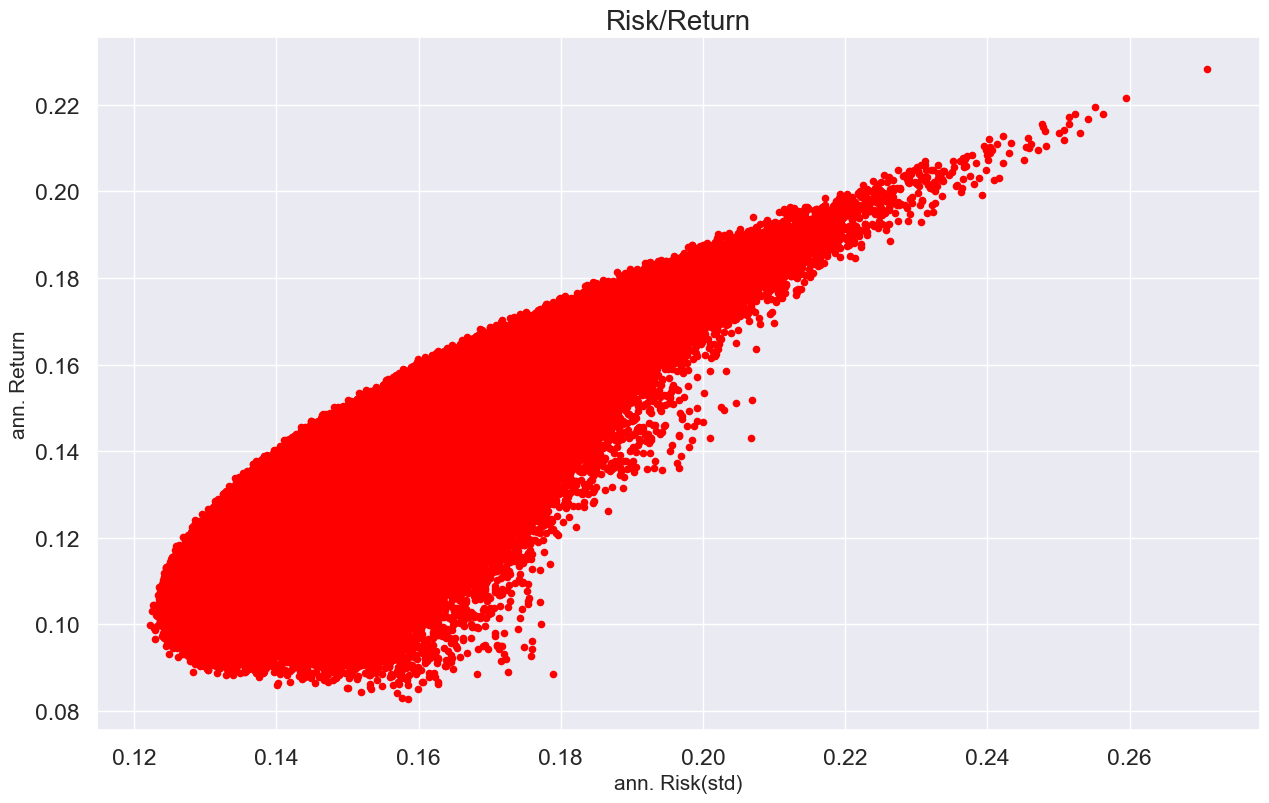

In [221]:
# Plot the portfolios (risk & return): 

plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [222]:
summ.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1566,0.7331
std,0.0151,0.0126,0.0594
min,0.0828,0.1222,0.3828
25%,0.1243,0.1476,0.6966
50%,0.1350,0.1554,0.7412
75%,0.1451,0.1641,0.7760
max,0.2283,0.2709,0.8833


In [223]:
summ.Sharpe.idxmax()

873915

In [224]:
# The best sharp ratio portfilio
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8833
Name: 873915, dtype: float64

In [225]:
# and its weigths
weights[summ.Sharpe.idxmax()]

# this is the weigths of the best sharp ratio portfilio

array([3.45964754e-01, 1.77094106e-01, 8.56191979e-05, 8.51874520e-03,
       4.54615917e-01, 1.37208588e-02])

In [226]:
# Get the portfolio weigths base on the best sharp ratio portfolio:  
PF1 = pd.Series(index = summary_C.index, data = weights[summ.Sharpe.idxmax()])
PF1
# By the best sharp ratio, this is the weigths that should be in
# our best portfolio:

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64

---

# Changing Expected Returns

In [227]:
summary_C

,Return,Risk,SystRisk_var,beta,ER1
AMZN,0.3111,0.3100,0.0432,1.4237,0.2500
BA,0.2214,0.2330,0.0237,0.7800,0.1500
DIS,0.1006,0.1888,0.0191,0.6283,0.0800
IBM,-0.0442,0.1993,0.0201,0.6618,0.0800
KO,0.0717,0.1368,0.0109,0.3589,0.1000
MSFT,0.2504,0.2317,0.0350,1.1524,0.1500


In [228]:
# Expected return (version 2)
summary_C["ER2"] = [0.22, 0.18, 0.11, 0.11, 0.07, 0.12]
summary_C

,Return,Risk,SystRisk_var,beta,ER1,ER2
AMZN,0.3111,0.3100,0.0432,1.4237,0.2500,0.2200
BA,0.2214,0.2330,0.0237,0.7800,0.1500,0.1800
DIS,0.1006,0.1888,0.0191,0.6283,0.0800,0.1100
IBM,-0.0442,0.1993,0.0201,0.6618,0.0800,0.1100
KO,0.0717,0.1368,0.0109,0.3589,0.1000,0.0700
MSFT,0.2504,0.2317,0.0350,1.1524,0.1500,0.1200


In [229]:
# Calculate the expected return for our 1000000 portfolios
Return = summary_C.ER2.dot(weights.T)
Return

array([0.1348312 , 0.15137105, 0.133529  , ..., 0.12971648, 0.14664487,
       0.12244864])

In [232]:
# Calculate the expected risk for our 1000000 portfolios
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))

In [233]:
# Calculate the sharp ratio for our 1000000 portfolios
Sharpe = (Return - rf) / Risk

In [234]:
summ2 = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ2

,Return,Risk,Sharpe
0,0.1348,0.1534,0.7487
1,0.1514,0.1712,0.7675
2,0.1335,0.1588,0.7147
3,0.1288,0.1466,0.7416
4,0.1477,0.1724,0.7411
...,...,...,...
999995,0.1226,0.1531,0.6700
999996,0.1533,0.1665,0.8003
999997,0.1297,0.1493,0.7351
999998,0.1466,0.1640,0.7724


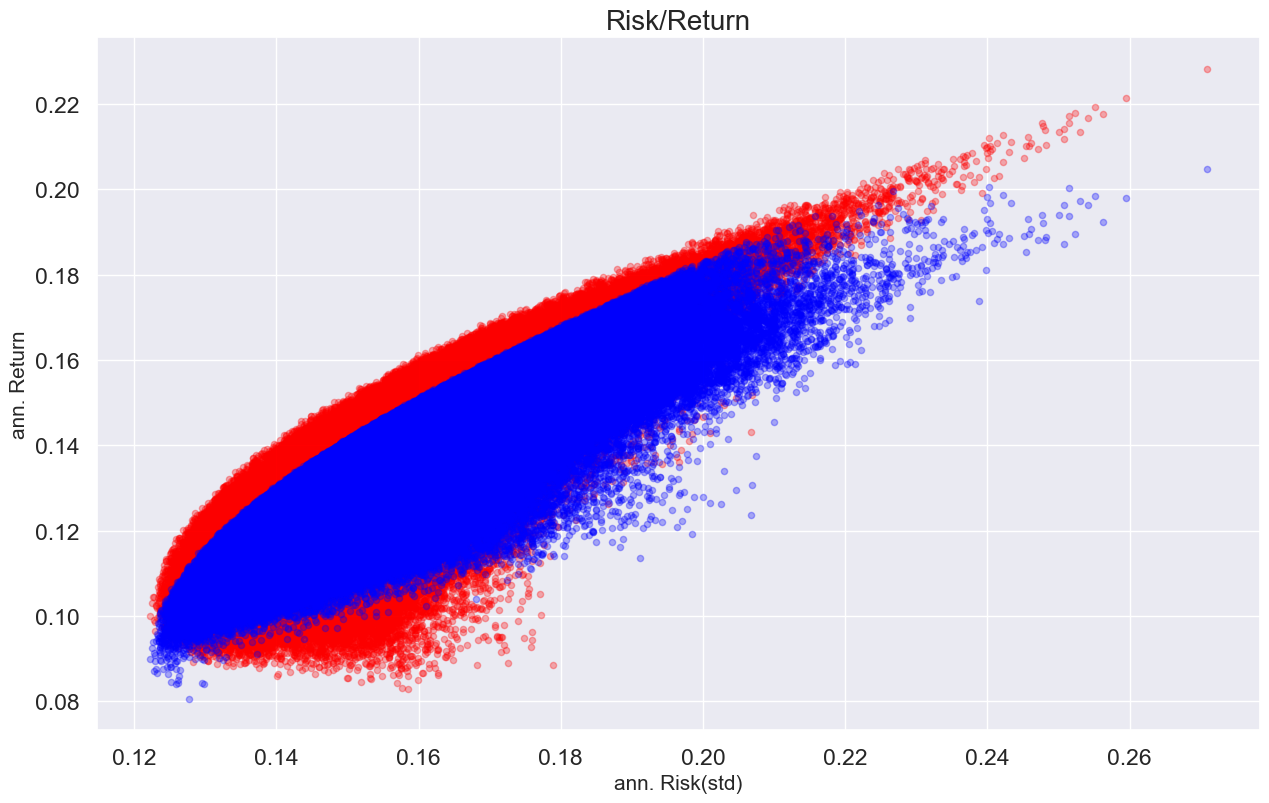

In [235]:
# Plot 1000000 portfolio with expected return (version 1),
# and plot 1000000 portfolio with expected return (version 2)

plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red", alpha = 0.3)
plt.scatter(summ2.Risk, summ2.Return,s= 20, color = "blue", alpha = 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

# Conclusion:
# Look how small change on the expected return can change all
# the portsolios risk & return. 

In [236]:
summ2.describe()

,Return,Risk,Sharpe
count,1000000.0000,1000000.0000,1000000.0000
mean,0.1350,0.1566,0.7336
std,0.0127,0.0126,0.0433
min,0.0806,0.1222,0.4743
25%,0.1264,0.1476,0.7079
50%,0.1350,0.1554,0.7385
75%,0.1434,0.1641,0.7654
max,0.2048,0.2709,0.8234


In [237]:
summ2.Sharpe.idxmax()

812452

In [238]:
summ2.iloc[summ2.Sharpe.idxmax(), :]

Return   0.1683
Risk     0.1801
Sharpe   0.8234
Name: 812452, dtype: float64

In [239]:
summ.iloc[summ.Sharpe.idxmax(), :]

Return   0.1613
Risk     0.1599
Sharpe   0.8833
Name: 873915, dtype: float64

In [240]:
weights[summ2.Sharpe.idxmax()]

array([0.29233733, 0.42676296, 0.10988534, 0.07280503, 0.09442998,
       0.00377936])

In [241]:
PF2 = pd.Series(index = summary_C.index, data = weights[summ2.Sharpe.idxmax()])
PF2

AMZN   0.2923
BA     0.4268
DIS    0.1099
IBM    0.0728
KO     0.0944
MSFT   0.0038
dtype: float64

In [242]:
PF1

AMZN   0.3460
BA     0.1771
DIS    0.0001
IBM    0.0085
KO     0.4546
MSFT   0.0137
dtype: float64